# Unsupervised Learning: Trade&Ahead

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
%load_ext nb_black
# makes Python code more structured automatically
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# importing library for PCA
from sklearn.decomposition import PCA

# to perform t-SNE
from sklearn.manifold import TSNE

<IPython.core.display.Javascript object>

In [2]:
# Reading input file
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking shape of dataframe
data.shape

(340, 15)

<IPython.core.display.Javascript object>

The dataframe has 340 rows and 15 columns.

In [4]:
# Taking a copy of the dataset so the original can be retained untouched
df = data.copy()

<IPython.core.display.Javascript object>

In [5]:
# Checking the shape of the new dataframe
df.shape

(340, 15)

<IPython.core.display.Javascript object>

All 340 rows are copied to the new dataframe

In [6]:
# CHecking sample top rows in dataframe
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060


<IPython.core.display.Javascript object>

In [7]:
# Checking random data from the dataframe
np.random.seed(1)
df.sample(n=10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000,-15.478,2.924,205,70,830000000,-14454000000,-35.550,406582278.500,93.089,1.786
125,FB,Facebook,Information Technology,Internet Software & Services,104.660,16.224,1.321,8,958,592000000,3669000000,1.310,2800763359.000,79.893,5.884
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.030,7.579,1.163,15,47,21818000,248710000,1.520,163625000.000,26.336,-1.269
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410,10.661,0.806,17,129,160383000,636056000,3.280,491391569.000,24.070,-2.257
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610,0.865,1.590,32,64,-588000000,-7829000000,-10.230,765298142.700,93.089,3.345
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516,-8.699,1.479,142,27,159000000,1293000000,2.970,435353535.400,17.682,-3.838
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130,-21.254,2.365,2,201,523803000,85171000,0.560,152091071.400,93.089,9.568
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040,-5.102,1.966,4,189,7786000000,-671000000,-0.790,849367088.600,93.089,17.346
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.620,3.654,1.160,20,99,2288000000,2297000000,5.140,446887159.500,10.432,-0.376
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480,7.067,1.581,12,67,412000000,968100000,2.260,428362831.900,14.814,4.219


<IPython.core.display.Javascript object>

Looks like there are no missing values as from the sample, but need to check on whole data. 
ANd we have information from various different sectors and wide spread data.

In [8]:
# Checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

There are 4 attributes which are of Object type, 4 which are of integer type and rest are all float type.

In [9]:
# Checking the statistical description of the numerical data in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.000,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000
Net Income,340.000,1494384602.941,3940150279.328,-23528000000.000,352301250.000,707336000.000,1899000000.000,24442000000.000
Earnings Per Share,340.000,2.777,6.588,-61.200,1.558,2.895,4.620,50.090
Estimated Shares Outstanding,340.000,577028337.754,845849595.418,27672156.860,158848216.100,309675137.800,573117457.325,6159292035.000
P/E Ratio,340.000,32.613,44.349,2.935,15.045,20.820,31.765,528.039


<IPython.core.display.Javascript object>

* The description shows that there are no missing values in all the numerical columns. The mean, standard deviation and data at each quartiles is shown. 
* Almost all the columns have a visible increases from 3rd Quarter to the 4th; need to check further if these are outliers. 
* CurrentPrice ranged from 4.5 to 1274.95 dollars; so we have good varied range of stocks involved in our data. Price change also ranged from -47.13 to 55.052 dollars for the 13 weeks. Similarly we can see values of every numeric variable in the above description.

In [10]:
df.describe(exclude="number").T

,count,unique,top,freq
Ticker Symbol,340,340,CHD,1
Security,340,340,Range Resources Corp.,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


<IPython.core.display.Javascript object>

***Summary:***
* The description on non-numeric attributes shows that the Ticker Symbol is a unique value, 1 per row of dataset.
* Same is the case with Security, its a unique value in the dataframe.
* GICS_Sector has 11 distinct values and highest ocurring is Industrials with 53.
* GICS_Sub_Industry has 104 distinct values and Oil & Gas Exploration & Production is the highest ocurring with 16.

In [11]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

All the column names are taken care with an underscore in the names; to make them more meaningful.

In [13]:
# Checking if there are any row level duplicates
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no row level duplicates in the data.

In [14]:
# Checking for any missing values in the dataframe
df.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

There are no missing values in the dataframe

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

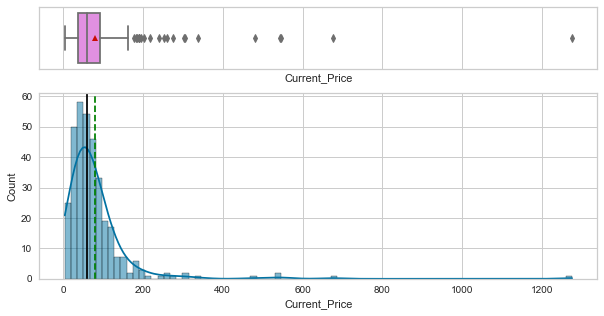

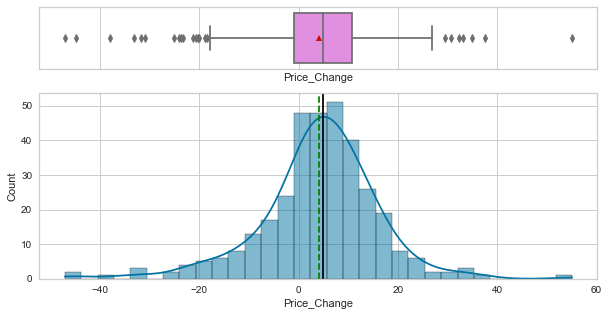

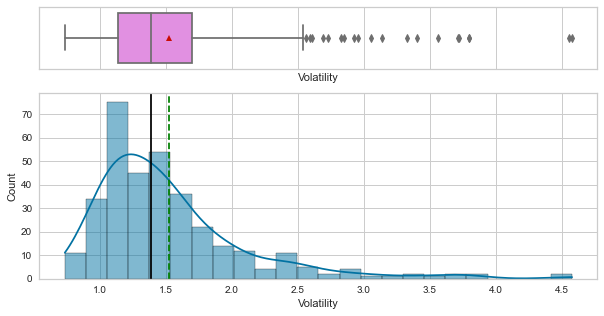

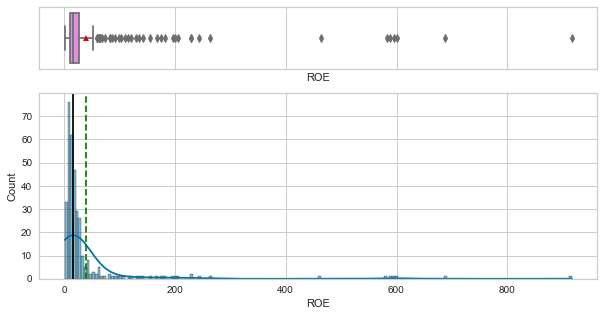

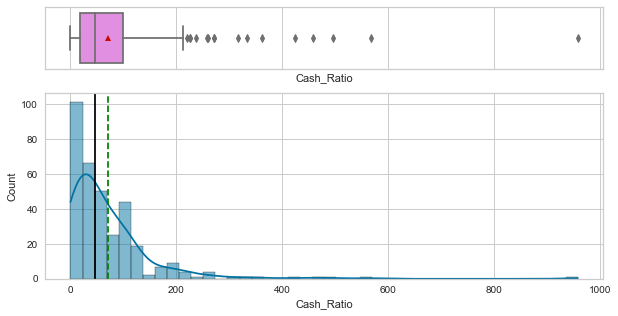

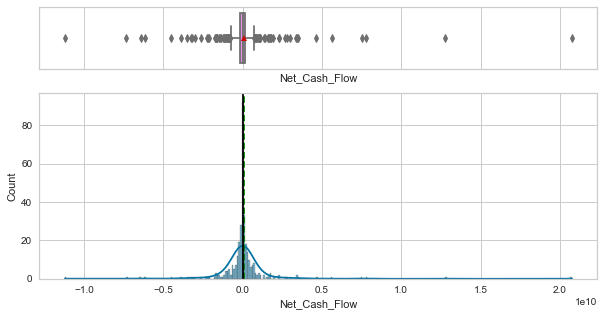

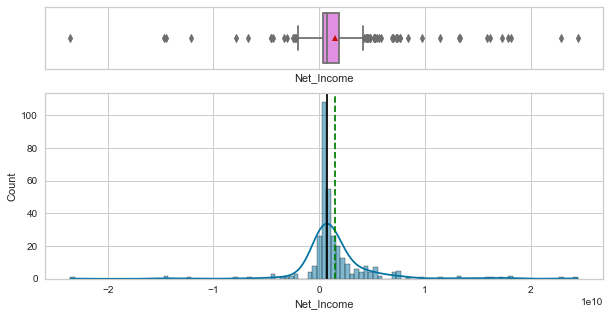

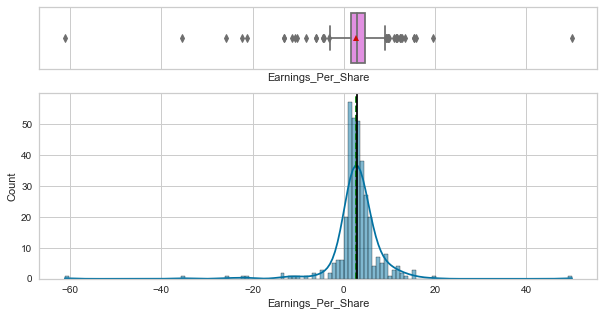

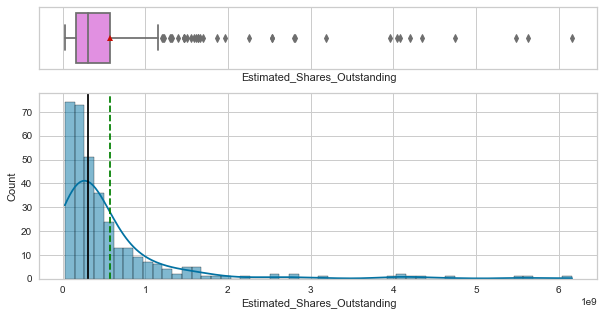

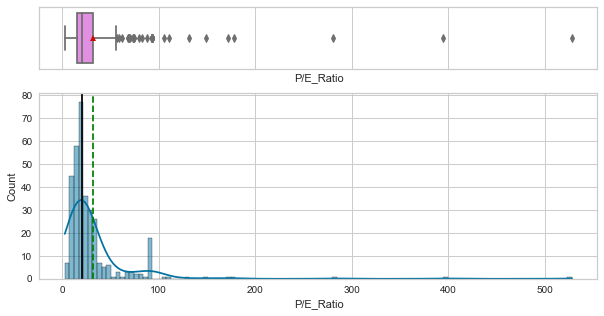

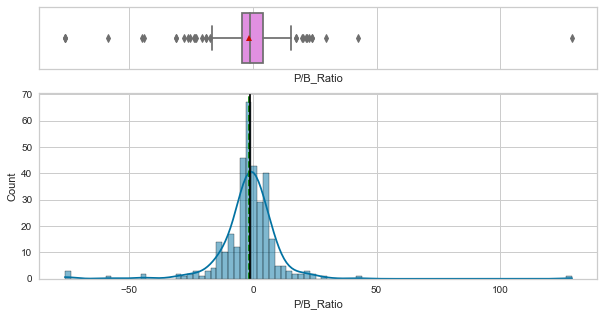

<IPython.core.display.Javascript object>

In [16]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
for feature in cols_list:
    histogram_boxplot(df, feature, figsize=(10, 5), kde=True, bins=None)

The histogram boxplot for all the numerical variables is shown. The boxplot shows there are outliers for almost all the attributes but will need to check further if they are real outliers or valid data. A detailed Univaraite analysis summary is provided down below.

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

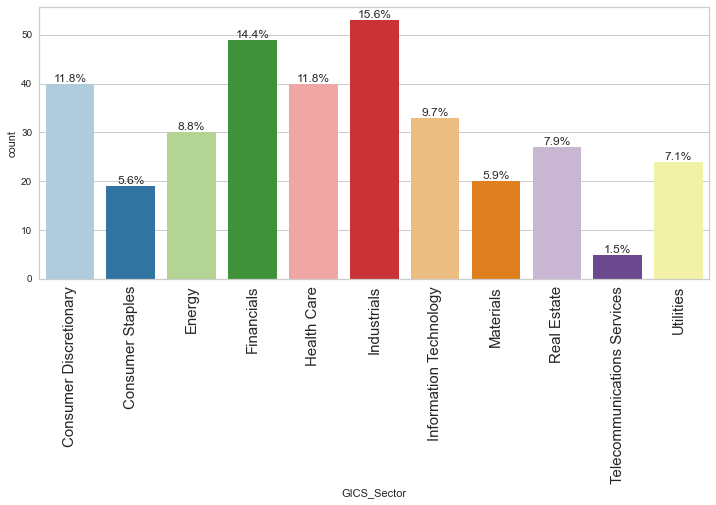

<IPython.core.display.Javascript object>

In [18]:
# labeled barplot on 'GICS_Sector'
labeled_barplot(df, "GICS_Sector", perc=True)

Our dataset has highest percentage of rows for Industrials sector with 15.6% followed by Financials with 14.4%. The least is for Telecommunication Services with 1.5%.

In [19]:
# Finding number of distinct values in GICS Sub Industry
df["GICS_Sub_Industry"].unique().shape

(104,)

<IPython.core.display.Javascript object>

There are 104 distinct values in GICS_Sub_Industry attribute; so trying to see which are the top 5 and bottom 5.

In [20]:
# Finding the first 5 Sub Industries with highest frequency
df["GICS_Sub_Industry"].value_counts().head()

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Name: GICS_Sub_Industry, dtype: int64

<IPython.core.display.Javascript object>

There are 16 rows for the sub category 'Oil and Gas Exploration & Production' and that is the highest frequent ocurring value in the attribute.

In [21]:
# Finding the bottom 5 Sub Industry which are less frequently ocurring in our dataset
df["GICS_Sub_Industry"].value_counts().tail()

Industrial Materials                   1
Apparel, Accessories & Luxury Goods    1
Home Furnishings                       1
Electronic Equipment & Instruments     1
Diversified Commercial Services        1
Name: GICS_Sub_Industry, dtype: int64

<IPython.core.display.Javascript object>

There is 1 ocurrence for each of the above sub industries in our data.

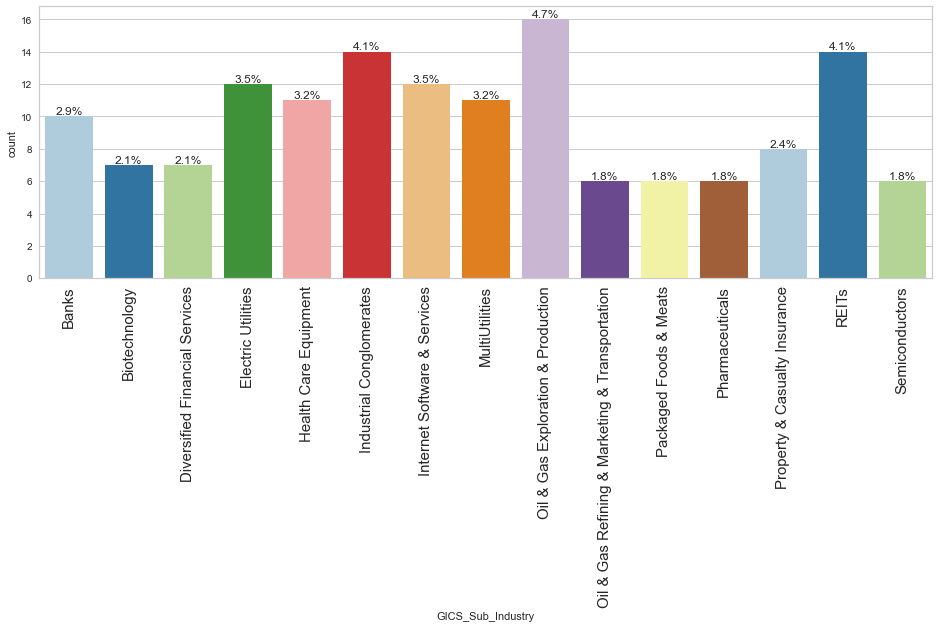

<IPython.core.display.Javascript object>

In [22]:
# Bar Plot on sample 15 Sub Industry
labeled_barplot(df, "GICS_Sub_Industry", perc=True, n=15)

### Observations:

**Univariate Analysis**
* Current_Price data is right skewed; it is varying a lot between 4 till 1270 dollars but these values looks like valid; they are current prices for various companies.
* Price_Change is symmetric with a bell curve; there are some values till negative 47 and positive 55; but seems they are valid. 
* Volatility is right skewed too, with values ranging from around 0.7 to 4.5; since the volatility is the standard deviation of the stock price over the past 13 weeks and we have values ranging this is expected too.
* ROE has skewness on the right, values ranging from 1 till 917. ROE is generally a percentage obtained by dividing net income with share holders equity. If any of these is negative, the ROE values can be exceptionally high and I believe that is the reason for some higher ROE values in our data too.
* Cash_Ratio is right skewed too with values ranging from 0 till around 980.
* Net Cash Flow	is showing a symmetrial distribution on e power 10 scale with tails on both ends.
* Net Income also is a bell curve on e power 10 scale with tails on both ends.
* Earnings Per Share as well is symmetric on e power 10 scale with tails on both ends.
* Estimated Shares Outstanding is right skewed with values ranging from around 0 till 6 times e power 9 scale.
* P/E Ratio shows 2 bell curves with a huge tail on right side, values ranging from 9 till around 500.
* P/B Ratio is symmetrical with a bell curve with values ranging from negative 75 till positive 120.
* The dataset has data for 11 different Sectors wherein Industrials are at top with 15.6% and Telecommunications Services the least with 1.5%.
* There are 104 distinct values in GICS_Sub_Industry attribute; where the sub category 'Oil and Gas Exploration & Production' is the highest frequent ocurring value in the attribute with 16 rows. There are many sub categories that have 1 ocurrence for each like 'Drug Retail', 'Trucking', 'Tires & Rubber' , 'Apparel, Accessories & Luxury Goods', 'Environmental Services'. 

In [23]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

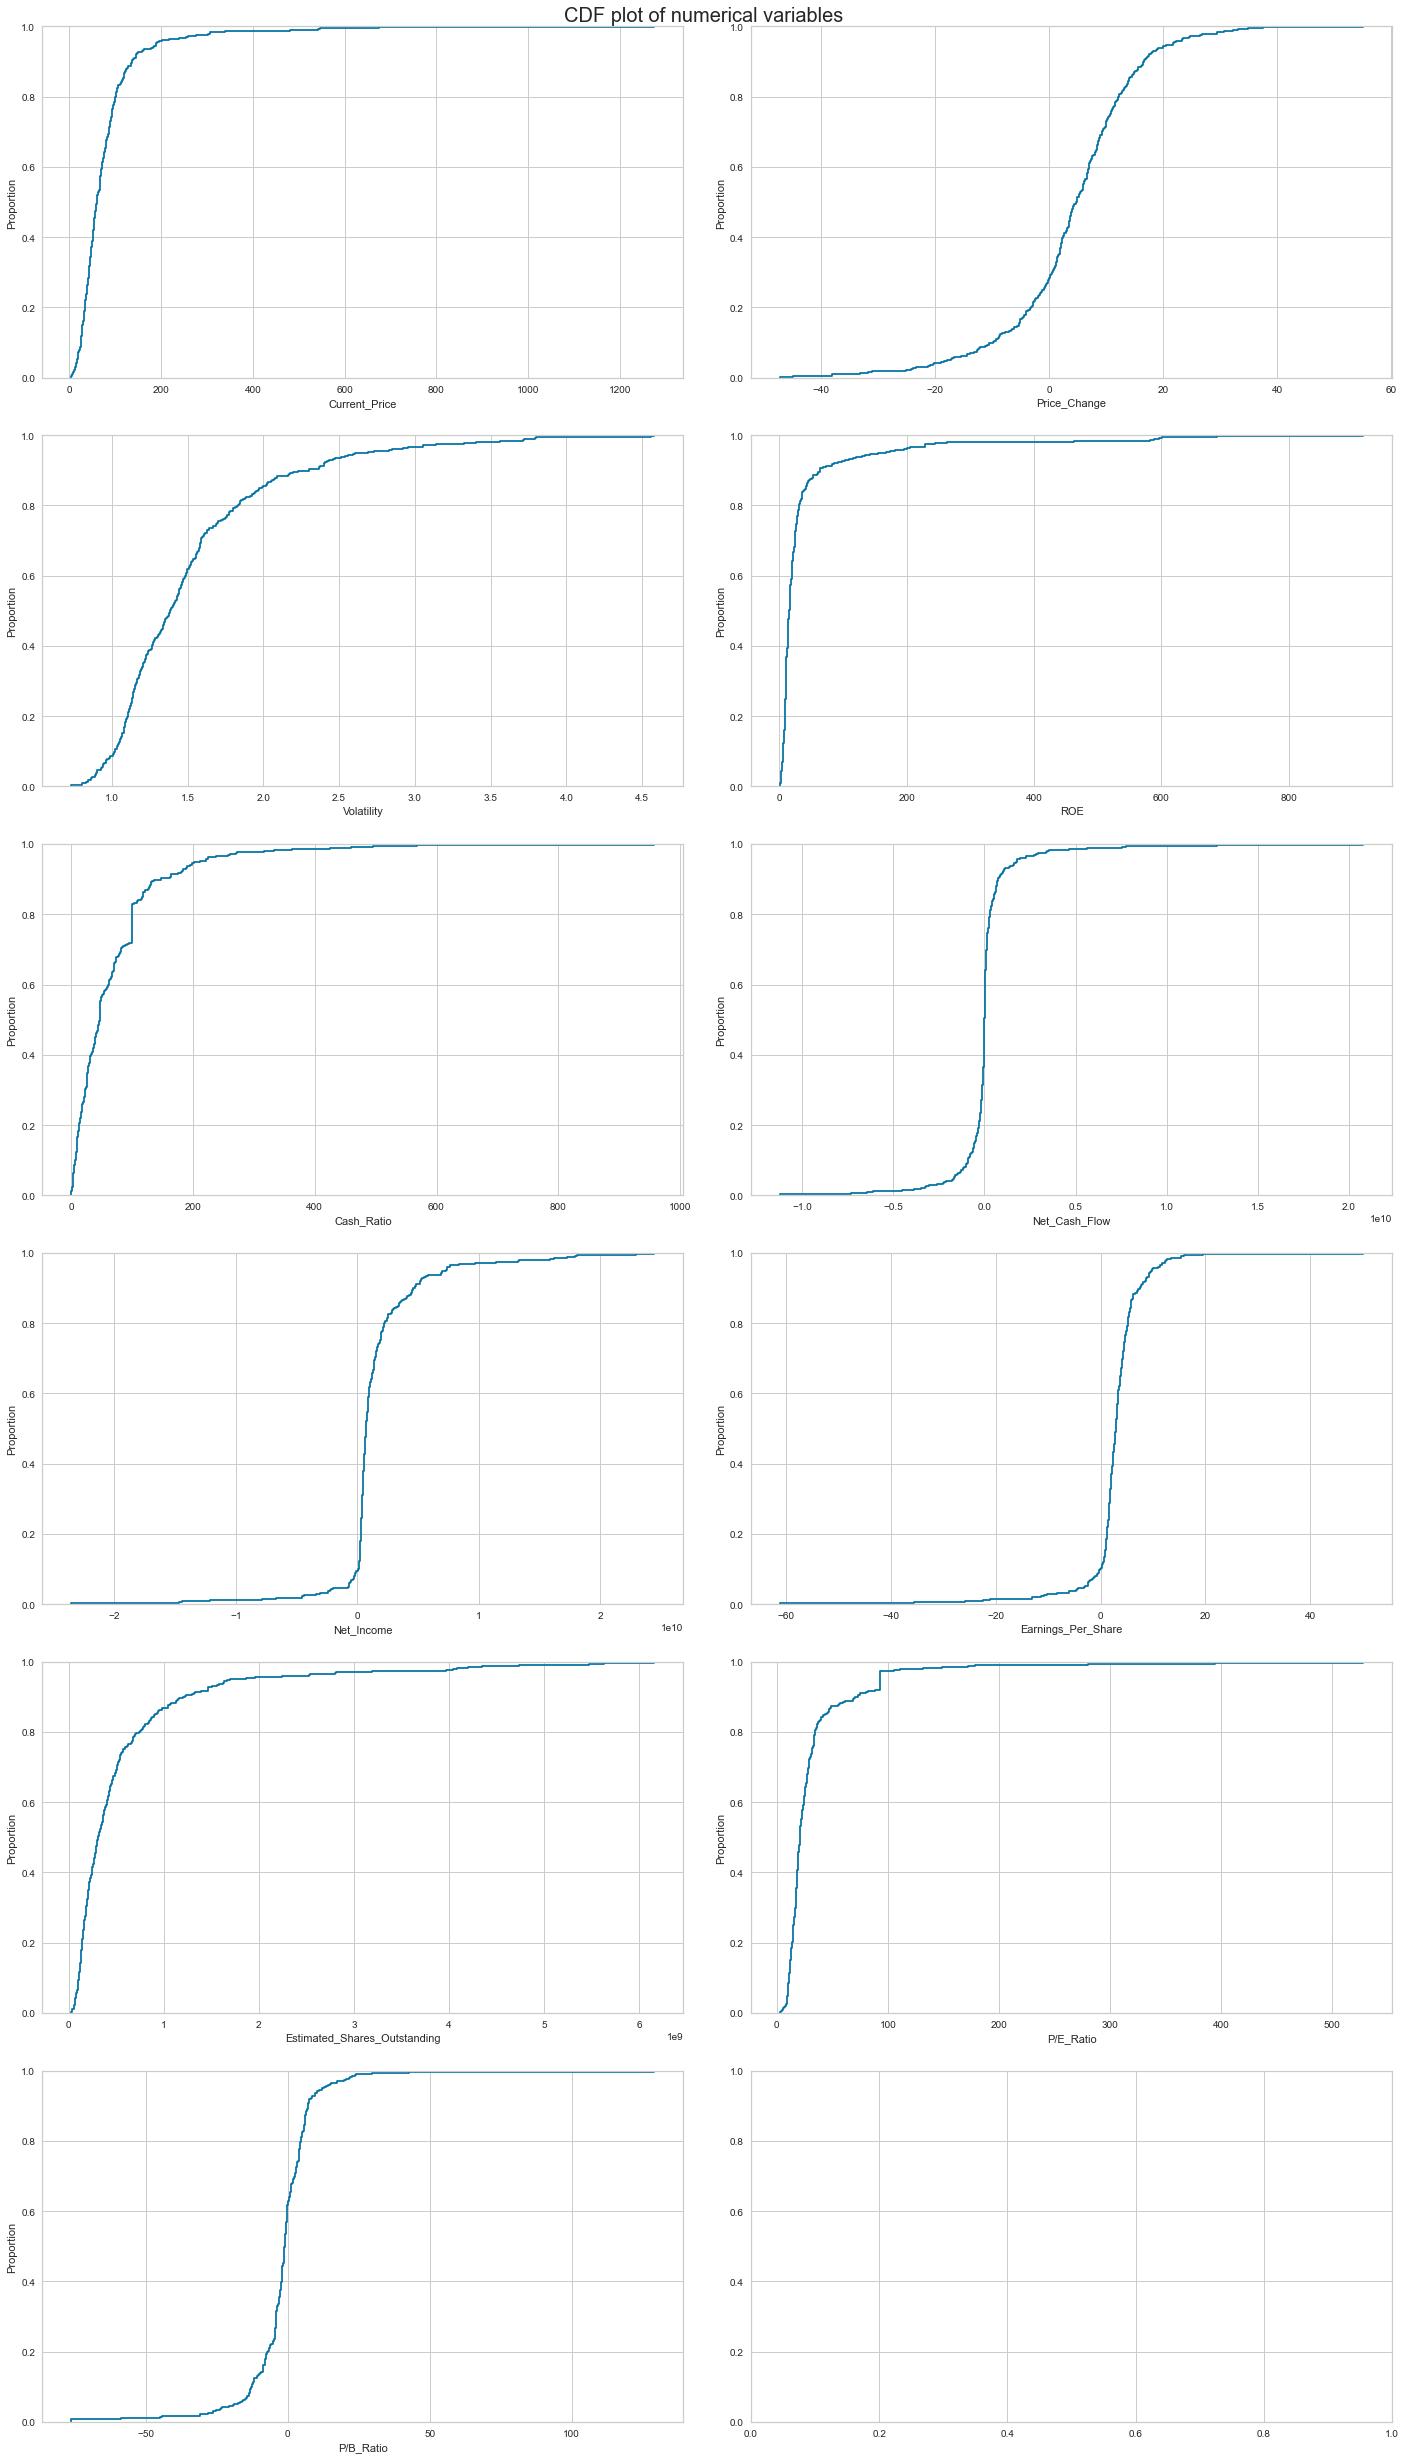

<IPython.core.display.Javascript object>

In [24]:
fig, axes = plt.subplots(6, 2, figsize=(20, 35))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

***CDF Plots Summary:***
* Around 95% of rows have Current_Price less than 200 dollars.
* Around 10% has Price_change less than 0 and around 85% are between 0 and 20.
* Volatility is less than 2.5 for almost 90% of rows.
* Almost 90% of rows have ROE values less than 100.
* Cash_Ratio is less than 200 for almost 90% of the data.
* Net_Cash_Flow is less than 0 for 1% data and 80% between 0 and 0.1 times e power 10.
* Net_Income is negative for 10% of data, and 95% is within 0.5 times e power 10
* Earnings_Per_Share has negative values for around 10% of the data and 95% lies within 10.
* Estimated_Shares_Outstanding 90% data is within 1.5 times e power 9.
* P/E_Ratio 90% of data is within 100.
* P/B_Ratio around 50% data is negative values; and 90% around data is within 10.

## Bivariate Analysis

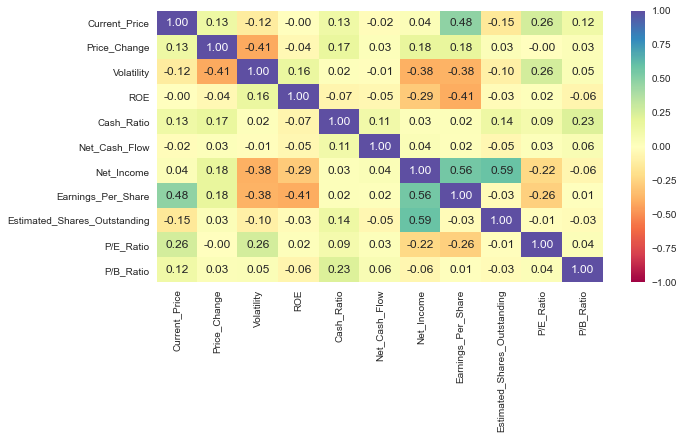

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

***Observations:***
From the Heat map, below are the observations on correlation of the attributes:
* Net_Income has a good positive correlation with Earnings_Per_Share and Estimated_Shares_Outstanding. It is obvious becase the product of these 2 attributes is equal to the Net Income value.
* Current_Price is also showing some positive correlation with Earnings_per_Share.
* Net_Income is showing a negative correlation with Volatility and ROE. ROE value is exceptionally high when Net_Income becomes negative. 
* Earnings_Per_Share also shows negative correlation with the 2 attributes Volatility and ROE.

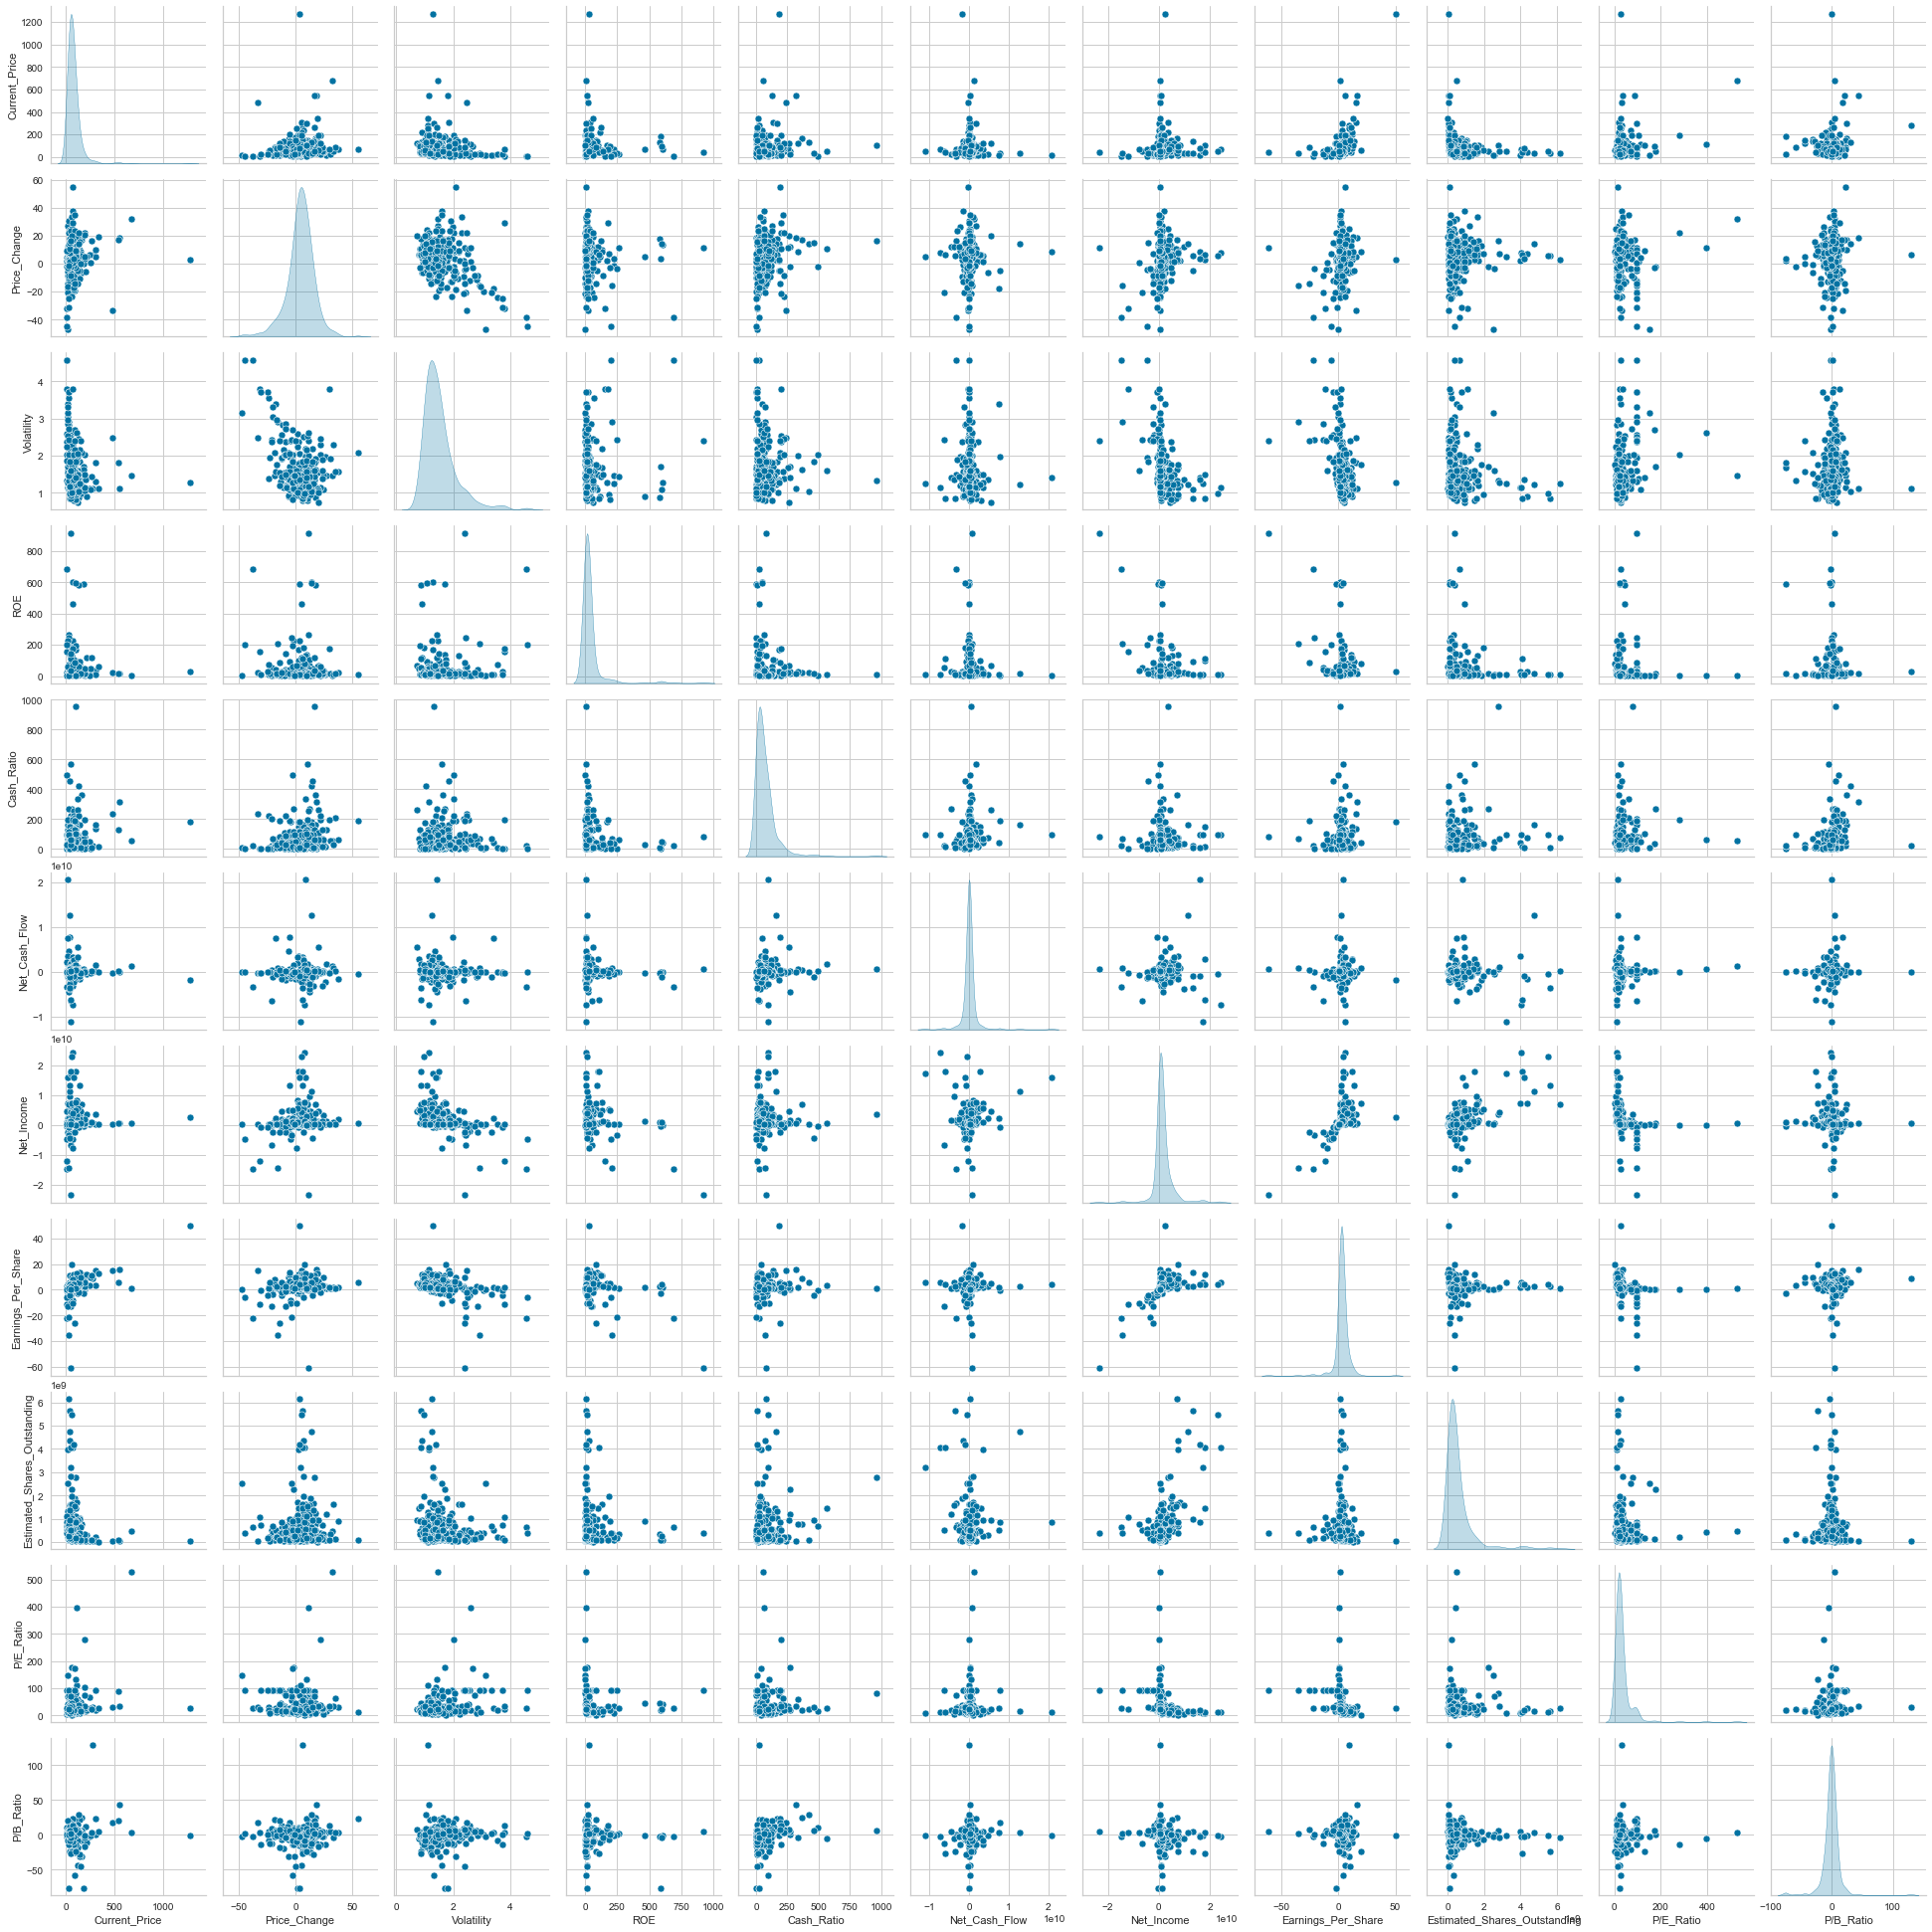

<IPython.core.display.Javascript object>

In [26]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

The KDE from above plot almost shows only 1 visible curve for all variables, except for P/E Ratio which shows 2 distinguishing curves. So based on that atleast 3 clusters of data is expected.

In [27]:
# Finding average Current stock price per sector
df.groupby("GICS_Sector")["Current_Price"].mean().sort_values(ascending=False)

GICS_Sector
Health Care                   132.048
Consumer Discretionary        128.095
Real Estate                    90.977
Materials                      76.552
Industrials                    74.412
Consumer Staples               71.973
Information Technology         63.548
Financials                     58.659
Utilities                      52.969
Energy                         46.042
Telecommunications Services    32.964
Name: Current_Price, dtype: float64

<IPython.core.display.Javascript object>

HealthCare sector has the highest average current price of stocks with 132 dollars and Telecommunications Services has the least current stock price average with 33 dollars.

In [28]:
# Creating a dataframe for HealthCare sector
df_HealthCare = df.loc[df["GICS_Sector"] == "Health Care"]

<IPython.core.display.Javascript object>

In [29]:
df_HealthCare.head()

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
19,ALXN,Alexion Pharmaceuticals,Health Care,Biotechnology,190.750,22.338,2.023,2,195,66000000,144000000,0.680,211764705.900,280.515,-14.171
23,AMGN,Amgen Inc,Health Care,Biotechnology,162.330,17.163,1.630,25,362,413000000,6939000000,9.150,758360655.700,17.741,24.012
28,ANTM,Anthem Inc.,Health Care,Managed Health Care,139.440,-0.620,1.512,11,70,-38200000,2560000000,9.730,263103802.700,14.331,-31.007


<IPython.core.display.Javascript object>

In [30]:
df_HealthCare.shape

(40, 15)

<IPython.core.display.Javascript object>

There are 40 rows under HealthCare Sector. 

In [31]:
df_HealthCare.groupby(["GICS_Sub_Industry"])["Net_Income"].mean()

GICS_Sub_Industry
Biotechnology                    4345674571.429
Health Care Distributors          837703666.667
Health Care Equipment             957825272.727
Health Care Facilities            845032000.000
Health Care Supplies              227361500.000
Life Sciences Tools & Services    352820000.000
Managed Health Care              2419600000.000
Pharmaceuticals                  3356833333.333
Name: Net_Income, dtype: float64

<IPython.core.display.Javascript object>

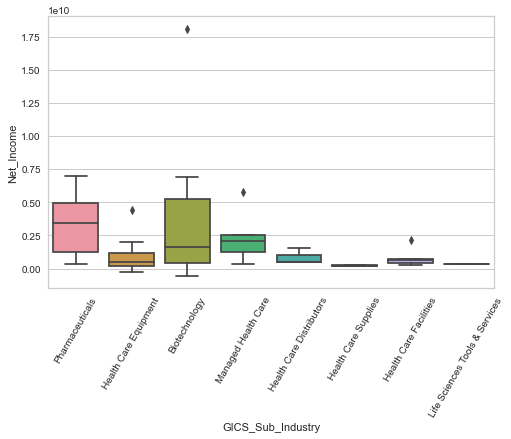

<IPython.core.display.Javascript object>

In [32]:
# Plotting Net_Income vs Sub sector for the HealthCare dataframe
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_HealthCare, y="Net_Income", x="GICS_Sub_Industry")
plt.xticks(rotation=60)
plt.show()

For the dataframe with HealthCare sector rows, Net Income is plotted against Sub_Industry and it shows that Biotechnology has a wide spread of NetIncome followed by Pharmaceuticals. Health Care Supplies and Life Sceinces Tools and Services has a very minimal range of values probably very less data in those sectors.

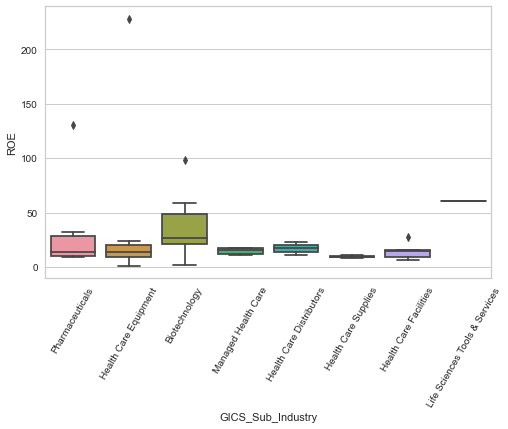

<IPython.core.display.Javascript object>

In [33]:
# Plotting ROE vs Sub Industry from the Healthcare dataframe
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_HealthCare, y="ROE", x="GICS_Sub_Industry")
plt.xticks(rotation=60)
plt.show()

For the same HealthCare dataframe, ROE is plotted against Sub Industry and it shows there is a wide spared of ROE values for BioTechnology and  for Health Care Equipment there is an outlier value near 220.

In [34]:
# Finding out average price change for each sector
df.groupby("GICS_Sector")["Price_Change"].mean().sort_values(ascending=False)

GICS_Sector
Health Care                     9.586
Consumer Staples                8.685
Information Technology          7.217
Telecommunications Services     6.957
Real Estate                     6.206
Consumer Discretionary          5.846
Materials                       5.590
Financials                      3.865
Industrials                     2.833
Utilities                       0.804
Energy                        -10.228
Name: Price_Change, dtype: float64

<IPython.core.display.Javascript object>

Health Care Sector has the highest average Price change in stock price in 13 weeks, with a 9.586 value. Least is for Energy sector with a negative 10.22

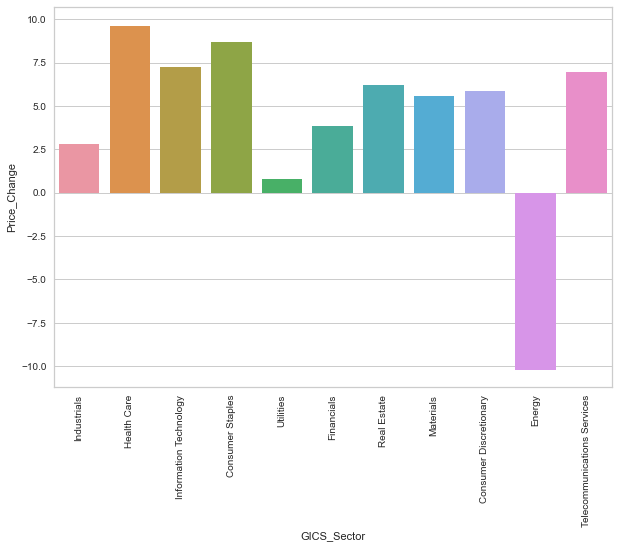

<IPython.core.display.Javascript object>

In [35]:
# Barplot for checking average price change for each sector
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="GICS_Sector", y="Price_Change", ci=False)
plt.xticks(rotation=90)
plt.show()

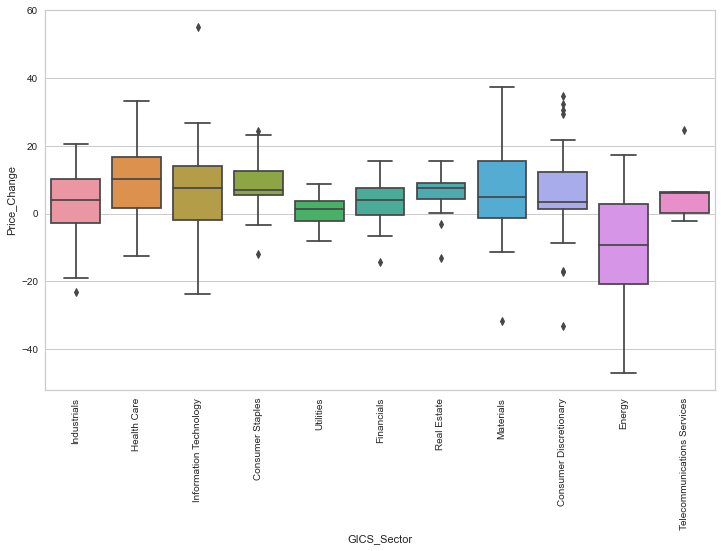

<IPython.core.display.Javascript object>

In [36]:
# Boxplot of price change across sector
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="GICS_Sector", y="Price_Change")
plt.xticks(rotation=90)
plt.show()

The plots above also show HealthCare is the sector having highest average Price_Change values.
Energy sector has most values in negative.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [37]:
# Finding average Cash Ratio values across each sector
df.groupby("GICS_Sector")["Cash_Ratio"].mean().sort_values(ascending=False)

GICS_Sector
Information Technology        149.818
Telecommunications Services   117.000
Health Care                   103.775
Financials                     98.592
Consumer Staples               70.947
Energy                         51.133
Real Estate                    50.111
Consumer Discretionary         49.575
Materials                      41.700
Industrials                    36.189
Utilities                      13.625
Name: Cash_Ratio, dtype: float64

<IPython.core.display.Javascript object>

Information Technology sector has the highest average Cash_Ratio with 149.8 and Utilities sector has the least with 13.625 average Cash_Ratio.

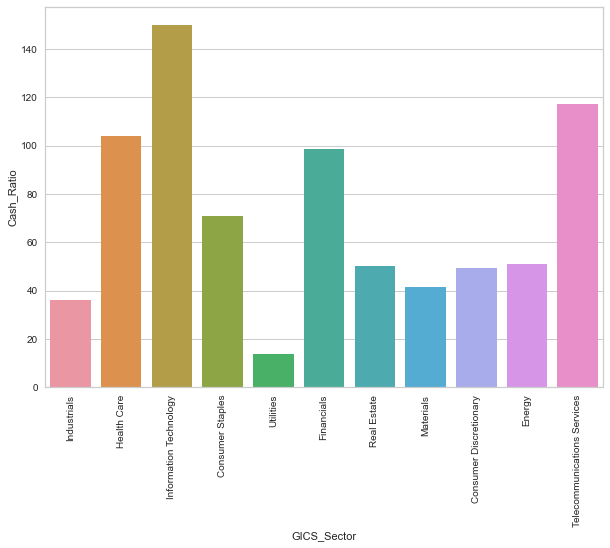

<IPython.core.display.Javascript object>

In [38]:
# Bar plot of Cash Ratio across each sector
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="GICS_Sector", y="Cash_Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

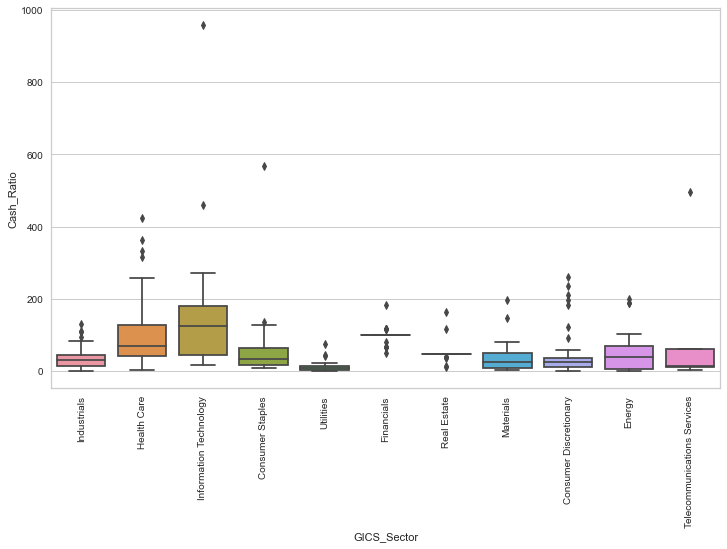

<IPython.core.display.Javascript object>

In [39]:
# Box plot of cash_ratio vs Sector
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="GICS_Sector", y="Cash_Ratio")
plt.xticks(rotation=90)
plt.show()

From the plots above too, it shows Information Technology is the sector with highest average Cash Ratio. It ranges from near 20 till around 270 and some outliers at around 500 and 950. So seems like IT companies have very good cash ratio that they can pay off outstanding debt and still have surplus cash left.

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [40]:
# Finding out average P/E Ratio for each sector
df.groupby("GICS_Sector")["Earnings_Per_Share"].mean().sort_values(ascending=False)

GICS_Sector
Health Care                    4.541
Consumer Discretionary         4.526
Industrials                    4.457
Financials                     4.220
Telecommunications Services    3.550
Consumer Staples               3.224
Materials                      3.129
Utilities                      2.753
Real Estate                    2.340
Information Technology         2.266
Energy                        -6.908
Name: Earnings_Per_Share, dtype: float64

<IPython.core.display.Javascript object>

HealthCare sector has the highest Earnings_per_share average of 4.5 and Energy sector has the least average with negative 6.908

In [41]:
# Finding out average P/E Ratio for each sector
df.groupby("GICS_Sector")["P/E_Ratio"].mean().sort_values(ascending=False)

GICS_Sector
Energy                        72.898
Information Technology        43.783
Real Estate                   43.066
Health Care                   41.135
Consumer Discretionary        35.212
Consumer Staples              25.521
Materials                     24.585
Utilities                     18.719
Industrials                   18.259
Financials                    16.023
Telecommunications Services   12.223
Name: P/E_Ratio, dtype: float64

<IPython.core.display.Javascript object>

Energy sector has the highest average P/E Ratio; with 72.9 and Telecommunications Services has the least average P/E Ratio with 12.22.

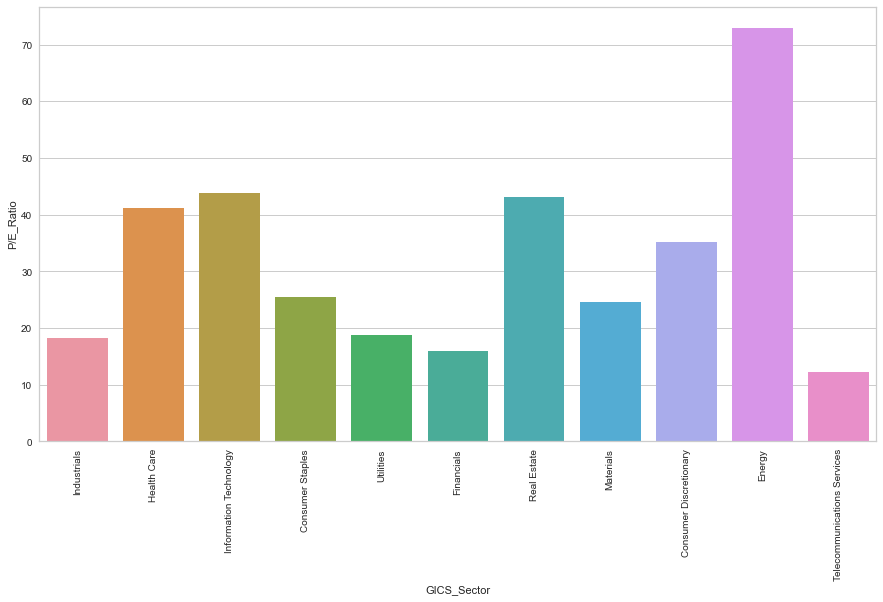

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS_Sector", y="P/E_Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

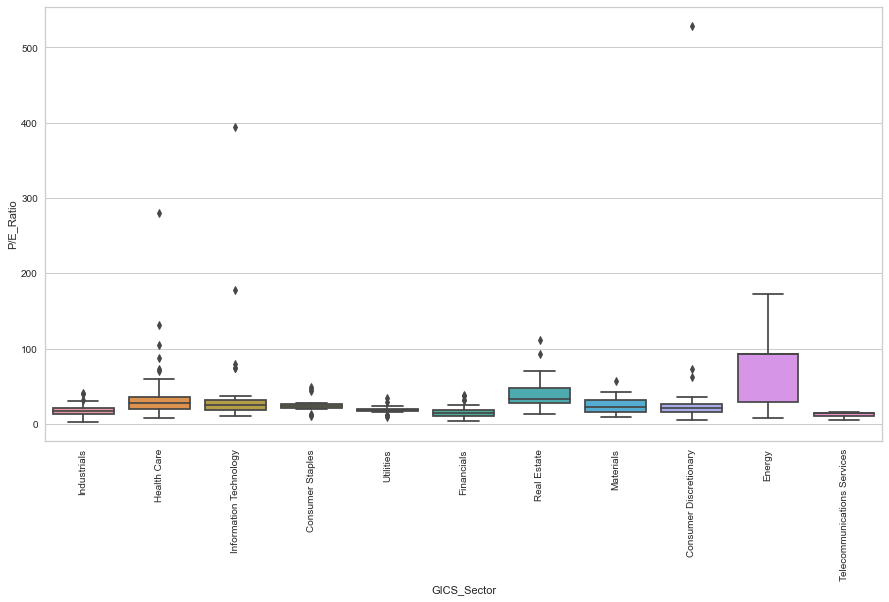

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="GICS_Sector", y="P/E_Ratio")
plt.xticks(rotation=90)
plt.show()

From the above plots too, Energy Sector has the highest average P/E Ratio among all the sectors.

**Some observations on data from my research**

For ROE, as per my research; a value around 14% is a good value. Looks like this is a % value, but our dataset has huge numbers in there. We could check with Business on these values

"Relatively high or low ROE ratios will vary significantly from one industry group or sector to another. Still, a common shortcut for investors is to consider a return on equity near the long-term average of the S&P 500 (14%) as an acceptable ratio and anything less than 10% as poor."

In [44]:
# Creating a dataframe for observations with ROE > 100
df_ROE_100plus = df.loc[df["ROE"] >= 100]
df_ROE_100plus.shape

(25, 15)

<IPython.core.display.Javascript object>

In [45]:
df_ROE_100plus.head()

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
18,ALLE,Allegion,Industrials,Building Products,65.920,13.753,1.284,601,45,-90800000,153900000,1.600,96187500.000,41.200,-0.877
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.470,11.398,2.405,917,80,698000000,-23528000000,-61.200,384444444.400,93.089,4.971
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.500,-38.102,4.560,687,22,-3283000000,-14685000000,-22.430,654703522.100,28.408,-1.841


<IPython.core.display.Javascript object>

In [46]:
# Finding which sectors have these observations of ROE > 100 to find if any common pattern
df_ROE_100plus["GICS_Sector"].value_counts()

Industrials                    6
Energy                         5
Consumer Staples               4
Consumer Discretionary         3
Health Care                    2
Financials                     2
Materials                      2
Telecommunications Services    1
Name: GICS_Sector, dtype: int64

<IPython.core.display.Javascript object>

From what I researched, looks like a good value of Cash Ratio is between 0.5 and 1. But our dataset has huge values in Cash Ratio.

"Anything above 1 shows that a company can pay off outstanding debts and still have a surplus of cash left. There is no ideal figure, but a cash ratio is considered good if it is between 0.5 and 1."


In [47]:
# Creating a dataframe of observations with Cash_Ratio >= 100
df_CashRatio_100plus = df.loc[df["Cash_Ratio"] >= 100]
df_CashRatio_100plus.shape

(59, 15)

<IPython.core.display.Javascript object>

In [48]:
df_CashRatio_100plus.head()

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060
14,AKAM,Akamai Technologies Inc,Information Technology,Internet Software & Services,52.630,-23.791,1.385,10,225,50823000,321406000,1.800,178558888.900,29.239,4.282
19,ALXN,Alexion Pharmaceuticals,Health Care,Biotechnology,190.750,22.338,2.023,2,195,66000000,144000000,0.680,211764705.900,280.515,-14.171
20,AMAT,Applied Materials Inc,Information Technology,Semiconductor Equipment,18.670,26.834,1.460,18,131,1795000000,1377000000,1.130,1218584071.000,16.522,3.858


<IPython.core.display.Javascript object>

In [49]:
# Finding the sectors where CashRatio is >= 100
df_CashRatio_100plus["GICS_Sector"].value_counts()

Information Technology         19
Health Care                    13
Consumer Discretionary          6
Financials                      6
Energy                          4
Industrials                     3
Consumer Staples                3
Materials                       2
Real Estate                     2
Telecommunications Services     1
Name: GICS_Sector, dtype: int64

<IPython.core.display.Javascript object>

P/E Ratio is ratio of current company's stock price to earnings per share. 
For positive values, I see this calculation is right, P/E Ratio = current price/Earnings per share; but for negative values in Earnings Per share, the P/E Ratio has some random values.

In [50]:
# Creating a dataframe of observations with Cash_Ratio >= 100
df_neg_EPS = df.loc[df["Earnings_Per_Share"] <= 0]
df_neg_EPS.shape

(34, 15)

<IPython.core.display.Javascript object>

In [51]:
df_neg_EPS.head(10)

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.470,11.398,2.405,917,80,698000000,-23528000000,-61.200,384444444.400,93.089,4.971
31,APC,Anadarko Petroleum Corp,Energy,Oil & Gas Exploration & Production,48.580,-20.802,2.435,52,22,-6430000000,-6692000000,-13.180,507738998.500,93.089,-12.861
33,ARNC,Arconic Inc,Industrials,Aerospace & Defense,7.399,1.648,2.592,3,37,42000000,-322000000,-0.310,1038709677.000,18.688,2.640
44,BHI,Baker Hughes Inc,Energy,Oil & Gas Equipment & Services,46.150,-12.312,2.560,12,84,584000000,-1967000000,-4.490,438084632.500,93.089,13.491
49,BSX,Boston Scientific,Health Care,Health Care Equipment,18.440,11.758,1.492,4,13,-268000000,-239000000,-0.180,1327777778.000,31.469,-3.881
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.500,-38.102,4.560,687,22,-3283000000,-14685000000,-22.430,654703522.100,28.408,-1.841
64,CHTR,Charter Communications,Consumer Discretionary,Cable & Satellite,183.100,3.599,1.698,589,0,2000000,-271000000,-2.430,111522633.700,20.820,-76.119
74,CNP,CenterPoint Energy,Utilities,MultiUtilities,18.360,1.436,1.390,20,43,-34000000,-692000000,-1.610,429813664.600,17.313,0.517
76,COG,Cabot Oil & Gas,Energy,Oil & Gas Exploration & Production,17.690,-20.099,3.056,6,0,-20440000,-113891000,-0.280,406753571.400,93.089,-0.223
93,DISCA,Discovery Communications-A,Consumer Discretionary,Cable & Satellite,26.680,2.027,1.689,19,25,23000000,1034000000,-2.430,111522633.700,20.820,-76.119


<IPython.core.display.Javascript object>

Like as shown above, there are some rows with random 90.0389 values. I am not sure how these got populated, in real time scenarios we can check with Business about these. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Outliers Check using Boxplots**

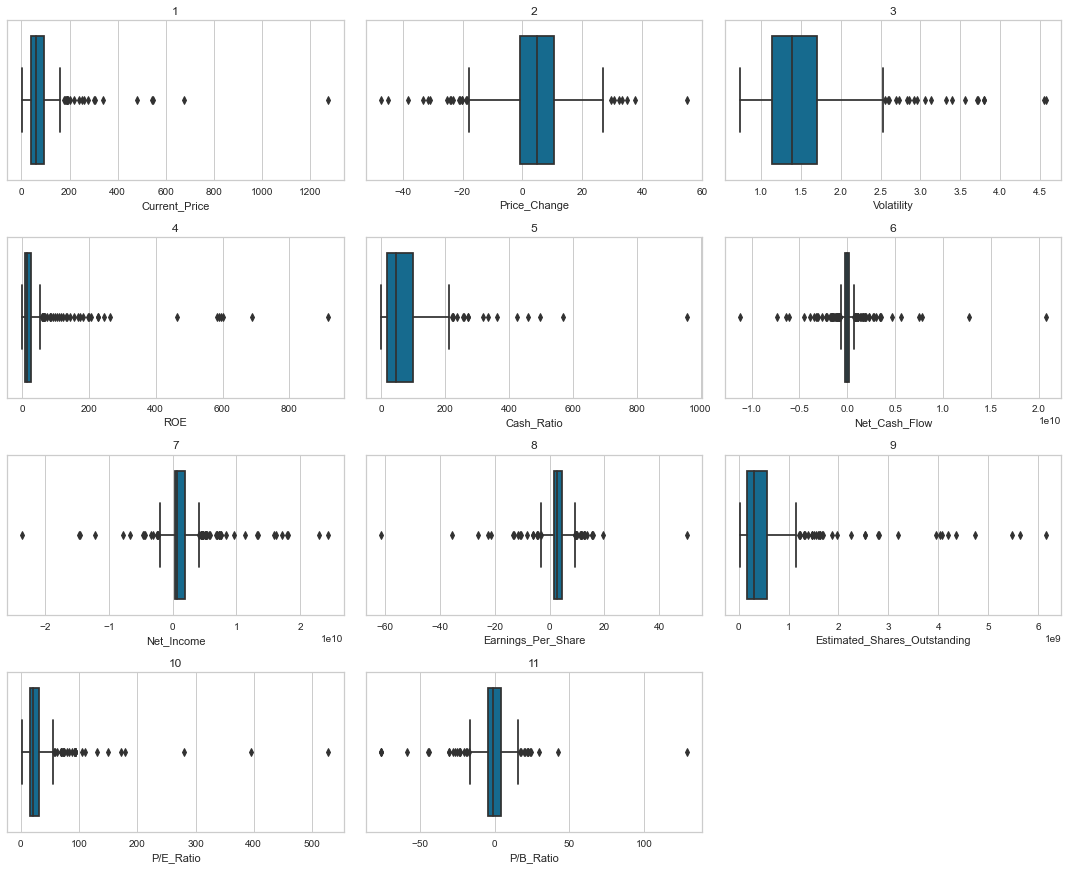

<IPython.core.display.Javascript object>

In [52]:
# Detecting outliers in the data using boxplot
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 45))

for i, variable in enumerate(cols_list):
    plt.subplot(15, 3, i + 1)
    sns.boxplot(data=df, x=cols_list[i])
    plt.tight_layout()
    plt.title(i + 1)
plt.show()

There are many values in each attribute which shows as outliers, but these are valid values too since this is STock information of various companies from various different Sectors. The stock prices do vary and accordingly the NetIncomes, other indicators and ratios vary. It is good idea to check with Business for confirmation in real time scenarios; but here am going forward with that basic assumption that these are valid values. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

Ticker_Symbol and Security are the unique values for each row and we wont be needing that for Clustering techniques. So we could drop them. And GICS_Sector and GICS_Sub_Industry also could be ignored for the Clustering methods since these are Object type. Hence only the numerical columns are copied to a different dataframe and used for Clustering. 

In [54]:
num_col

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

<IPython.core.display.Javascript object>

***Scaling data***

In [55]:
# Scaling the data set before clustering, so as to bring everything to 1 scale.
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [56]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

### K-Means Clustering

In [57]:
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068


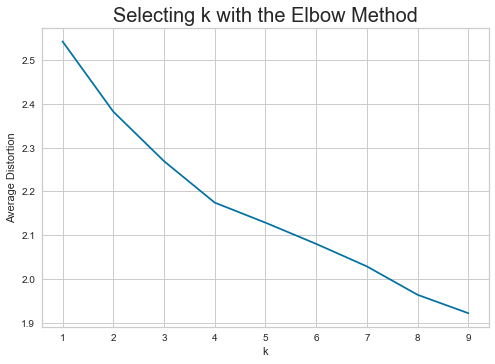

<IPython.core.display.Javascript object>

In [58]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

From the above Elbow curve, there is a good visible elbow at k=4. We can look at clusters with k=4 and k=3.

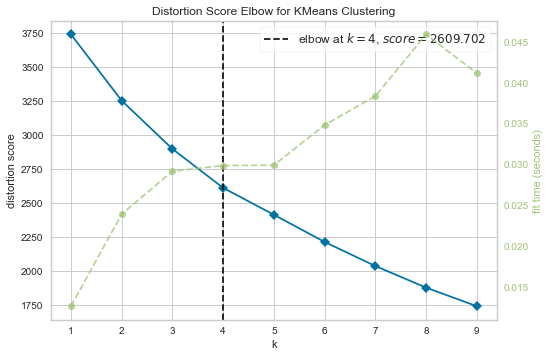

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [59]:
# Elbow Method to find the optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

From the KElbowVisualizer, the elbow is shown with a dotted line at k=4. Let us find the optimal K with other methods too.

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)


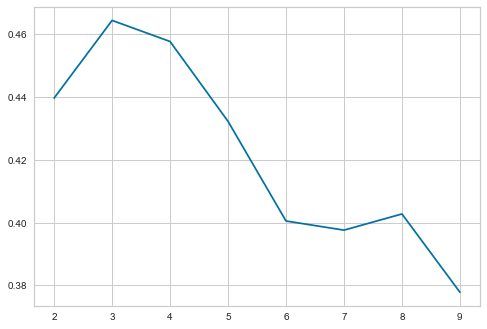

<IPython.core.display.Javascript object>

In [60]:
# Finding the optimal K value with Silhouette score method
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

#### From this plot the Silhouette score is good for k=3 and k=4. 

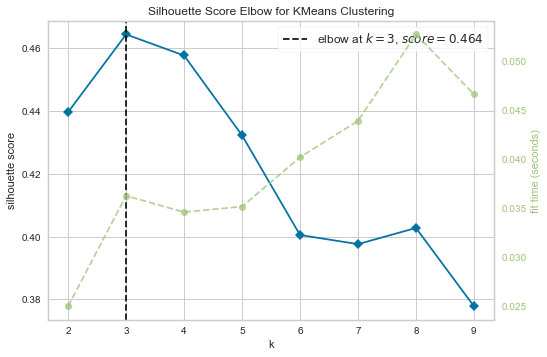

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [61]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

The KElbow Visualizer is run with SilhouetteScore as the Metric and it shows Elbow is at K=3. We will further try to check Silhouette Visualizer for values of K=3 and k=4 and 5 and finalize K. The time taken to fit the Clusters when k-3 and k=4 is the same.

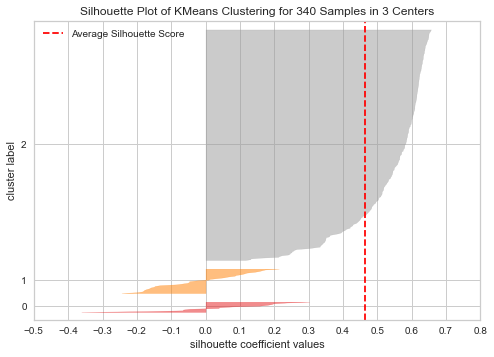

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [62]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

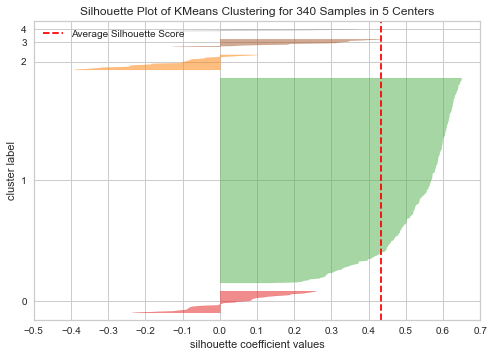

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

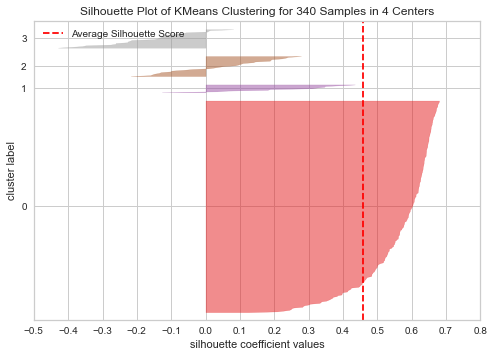

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [64]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

K=3 and K=4 still looks to be the best value for forming good Clusters in the data. 

Lets fit the K-means model with both values and check the observations in each cluster and decide

In [65]:
k_means_df1 = k_means_df.copy()
# fit K-means model for 3 clusters
kmeans1 = KMeans(n_clusters=3, random_state=1)
kmeans1.fit(k_means_df1)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [66]:
k_means_df1["K_means_segments"] = kmeans1.labels_

<IPython.core.display.Javascript object>

In [67]:
df1 = df.copy()
# adding kmeans cluster labels to the original dataframe
df1["K_means_segments"] = kmeans1.labels_

<IPython.core.display.Javascript object>

In [68]:
cluster_profile1 = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [69]:
cluster_profile1["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Ticker_Symbol"].count().values
)

<IPython.core.display.Javascript object>

In [70]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
1,64.183438,-10.557046,2.797776,96.531250,70.718750,159171125.000000,-3250005968.750000,-7.886875,526459323.057500,111.333230,1.783445,32
2,84.045331,5.542488,1.404255,34.040816,66.608844,10698350.340136,1445333183.673469,3.890051,427206184.715408,24.613743,-2.013147,294


<IPython.core.display.Javascript object>

With k=3, a majority of data like 294 observations went into 1 cluster. Lets try with value of k=4.

In [71]:
k_means_df2 = k_means_df.copy()
# fitting K-Means model
kmeans2 = KMeans(n_clusters=4, random_state=1)
kmeans2.fit(k_means_df2)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [72]:
k_means_df2["K_means_segments"] = kmeans2.labels_

<IPython.core.display.Javascript object>

In [73]:
df2 = df.copy()
# adding kmeans cluster labels to the original dataframe
df2["K_means_segments"] = kmeans2.labels_

<IPython.core.display.Javascript object>

In [74]:
cluster_profile2 = df2.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [75]:
df2.head()

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060,3


<IPython.core.display.Javascript object>

In [76]:
cluster_profile2["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Ticker_Symbol"].count().values
)

<IPython.core.display.Javascript object>

In [77]:
# let's display cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


<IPython.core.display.Javascript object>

With k=4, still there is a Cluster with maximum data points but we could get 3 more clusters with not so bad number of data points like 11, 25 and 27.

**I selected K=4 as optimal value, because there was 4th cluster formed with some good 11 observations and elbow curve also showed a nice elbow point at 4.**

**With K=4, we were able to form 4 clusters in data and count of records split like below:**
* Cluster 0 : 277
* Cluster 1: 11
* Cluster 2: 27
* Cluster 3: 25

In [78]:
# Code to print the companies in each cluster
for cl in df2["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

<IPython.core.display.Javascript object>

In [79]:
# Code to find number of companies in each sector, for each of the Clusters
df2.groupby(["K_means_segments", "GICS_Sector"])["Security"].count()

K_means_segments  GICS_Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          6
                  Financials                     45
                  Health Care                    29
                  Industrials                    52
                  Information Technology         24
                  Materials                      19
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  Telecommunications Services     2
2                 

<IPython.core.display.Javascript object>

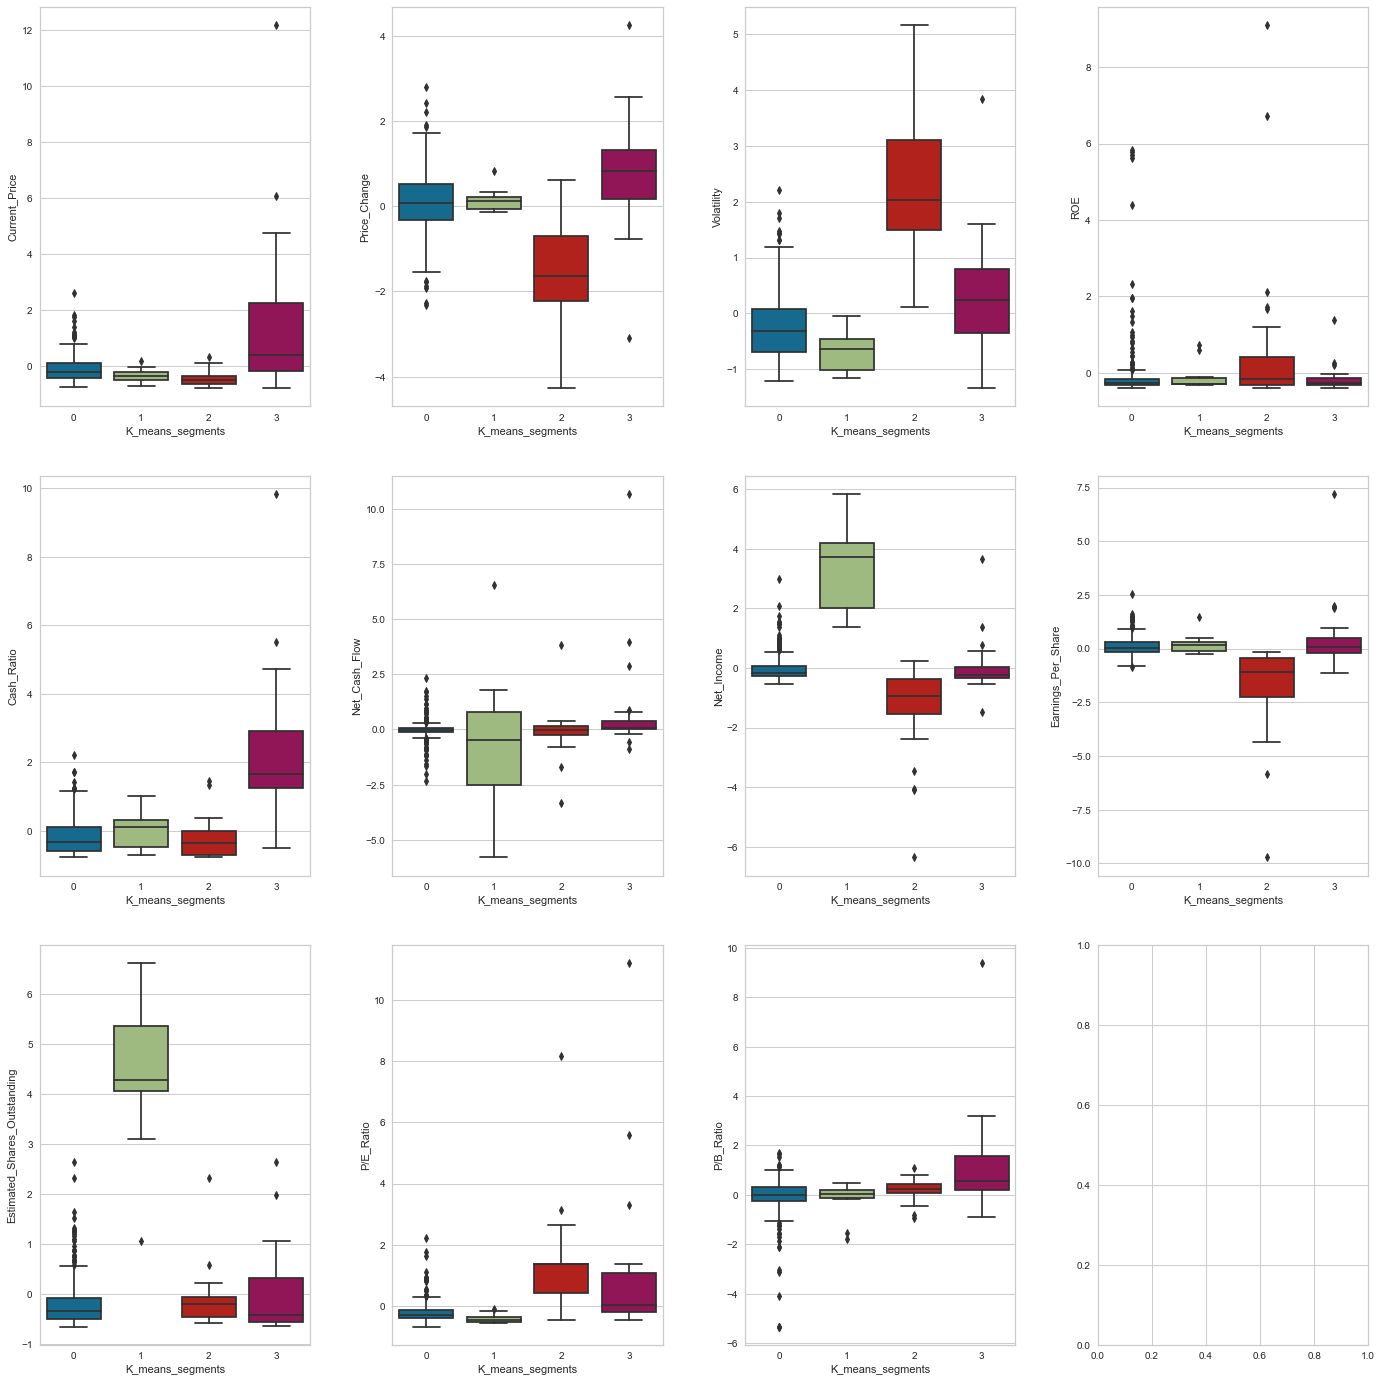

<IPython.core.display.Javascript object>

In [80]:
# Visualizing the Clusters on scaled data using Boxplots
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=k_means_df2,
                y=k_means_df2.columns[counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

In [81]:
df2.groupby(["K_means_segments"])["Current_Price"].mean()

K_means_segments
0    72.399
1    50.517
2    38.099
3   234.171
Name: Current_Price, dtype: float64

<IPython.core.display.Javascript object>

The average Current_Price of the stocks for each cluster shows, there is a good variation of data into each CLuster. 
Very less priced stocks went into CLuster 2, an average priced stocks went to Cluster 1, a little higher went to Cluster0, the highest average current price went into Cluster3.

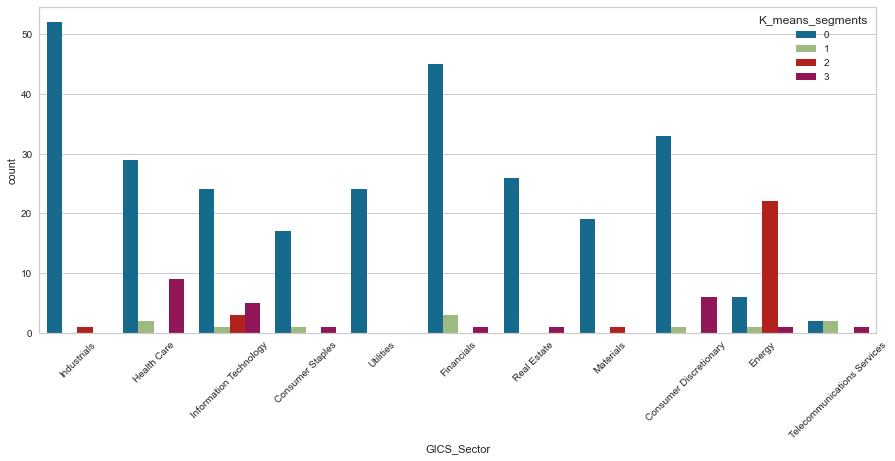

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df2, hue="K_means_segments", x="GICS_Sector")
plt.xticks(rotation=45)
plt.show()

This is the plot that shows the number of comapnies in each sector per each Cluster. Industrials, Utilities and FInancials sector companies majorily went into Cluster 0. Energy sector is majorily into Cluster 2. HealthCare and Consumer Discretionary have a good number into Cluster 3.

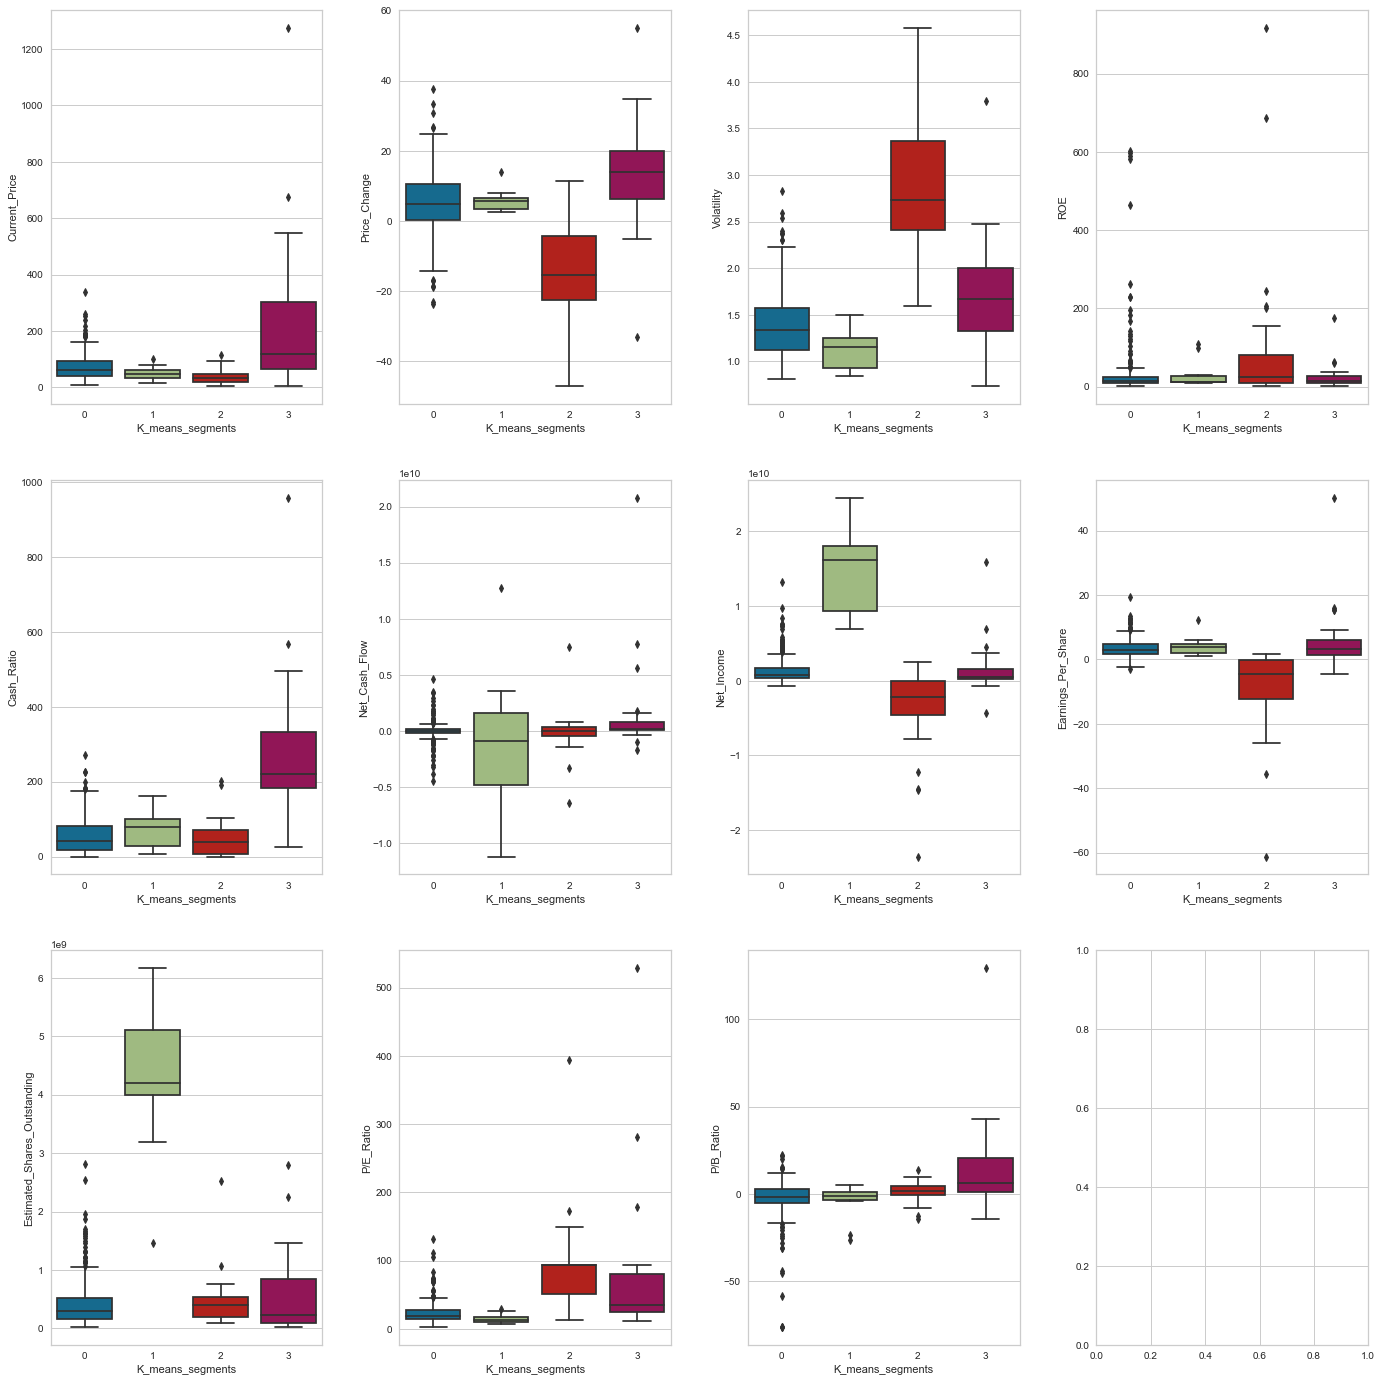

<IPython.core.display.Javascript object>

In [83]:
# Visualizing the Clusters on original data using Box plots
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4 + counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

<AxesSubplot:xlabel='K_means_segments', ylabel='P/E_Ratio'>

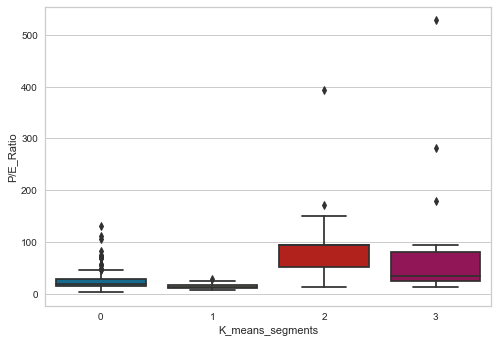

<IPython.core.display.Javascript object>

In [84]:
sns.boxplot(data=df2, x="K_means_segments", y="P/E_Ratio")

In [85]:
df2.groupby(["K_means_segments"])["P/B_Ratio"].mean()

K_means_segments
0   -3.359
1   -4.552
2    1.342
3   14.402
Name: P/B_Ratio, dtype: float64

<IPython.core.display.Javascript object>

## K-Means Clustering Insights

- **Cluster 0**:
    * This cluster contains majorty of the observations and the average Current_price of the stocks is around 72 dollars
    * The Price change of the stocks ranged from 0 to around 10 with an average of 5 dollars.
    * These are companies whose stock prices are volatile to a bit.
    * This Cluster has companies with average ROE 34.
    * This Cluster has companies with negative average net Cash Flow, but better than Cluster 2. The average Net Income of these companies is good positive values, higher than those of the Cluster 2.
    * This Cluster has companies with average Earnings per share as 3.6.
    * The companies in this cluster has average P/E ratio of 23 which is little high and P/B ratio is negative.
   
- **Cluster 1**:
    * This cluster contains those companies that have average Current_price of the stocks around 50 dollars
    * The Price change of the stocks ranged from 3 to around 6 with an average of 5 dollars.
    * These are companies whose stock prices are very less volatile.
    * This Cluster has companies with average ROE 31.
    * This Cluster has companies with lowest average Net Cash Flow of all and highest average Net Income of all.
    * This has companies with average Earnings per share as 4.1.
    * The companies in this cluster has average P/E ratio of 14 which is good and acceptable but P/B ratio is negative.

    
- **Cluster 2**:
    * This cluster contains companies that have average Current_price of the stocks around 38 dollars
    * The Price change of the stocks is all negative in this cluster, with a range from -22 to around -5 with an average of -15 dollars.
    * These are companies whose stock prices are most volatile of all.
    * This Cluster has companies with average ROE 107.
    * This Cluster has negative average Net Cash Flow values and lowest average Net Income with negative value which means they are at loss.
    * This Cluster has companies with lowest Earnings Per share, with values in negative.
    * Average P/E ratio for the companies in this cluster is 90 which is too high, and it has positive P/B ratio near to 1.

- **Cluster 3**:
    * This cluster contains companies that have average Current_price of the stocks around 234 dollars
    * The Price change of the stocks ranged from 8 to around 20 with an average of 13 dollars.
    * These are companies whose stock prices are more volatile compared to companies in clusters 0 and 1.
    * This Cluster has companies with average ROE 25.
    * This Cluster has companies with highest average Net Cash Flow. The average Net Income of these companies is also good, higher than Cluster0.
    * This Cluster has companies with highest Earnings Per share.
    * Average P/E Ratio for these companies is also higher and P/B ratio is around 14.

For all the clusters, the cash ratio is more than 1 and its considered high cash ratio. A high cash ratio indicates a business has more than enough cash to cover the short-term debts on its balance sheet.

In [86]:
pd.crosstab(df2.K_means_segments, df2.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
K_means_segments,,,,,,,,,,,
0,33,17,6,45,29,52,24,19,26,2,24
1,1,1,1,3,2,0,1,0,0,2,0
2,0,0,22,0,0,1,3,1,0,0,0
3,6,1,1,1,9,0,5,0,1,1,0


<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [87]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [88]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

<IPython.core.display.Javascript object>

In [89]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

In [90]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [91]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

CPU times: user 2.15 s, sys: 8.61 ms, total: 2.16 s
Wall time: 2.15 s


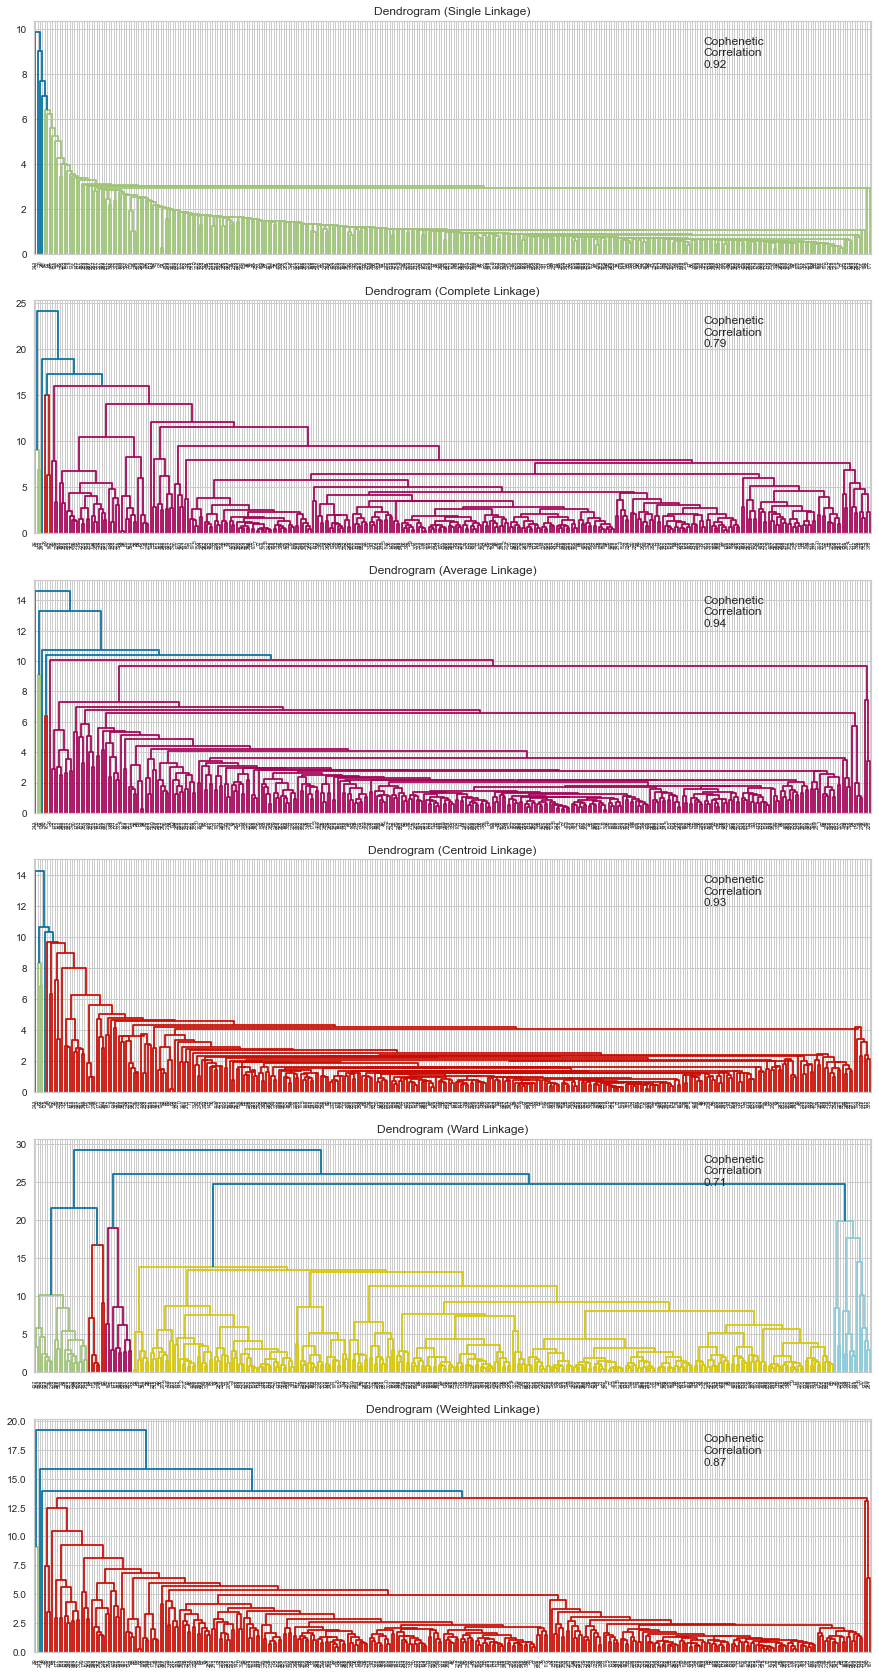

<IPython.core.display.Javascript object>

In [92]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [93]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient", ascending=False)
df_cc

,Linkage,Cophenetic Coefficient
2,average,0.942
3,centroid,0.931
0,single,0.923
5,weighted,0.869
1,complete,0.787
4,ward,0.710


<IPython.core.display.Javascript object>

Eucledian with average linkage seems to be having the best Copehentic Coefficient but looking at the dendrograms, Ward Linkage gave better and clear clusters.

**Let's see the dendrogram for Chebyshev and Manhattan distances with average and single linkage methods (as they gave high cophenetic correlation values).**

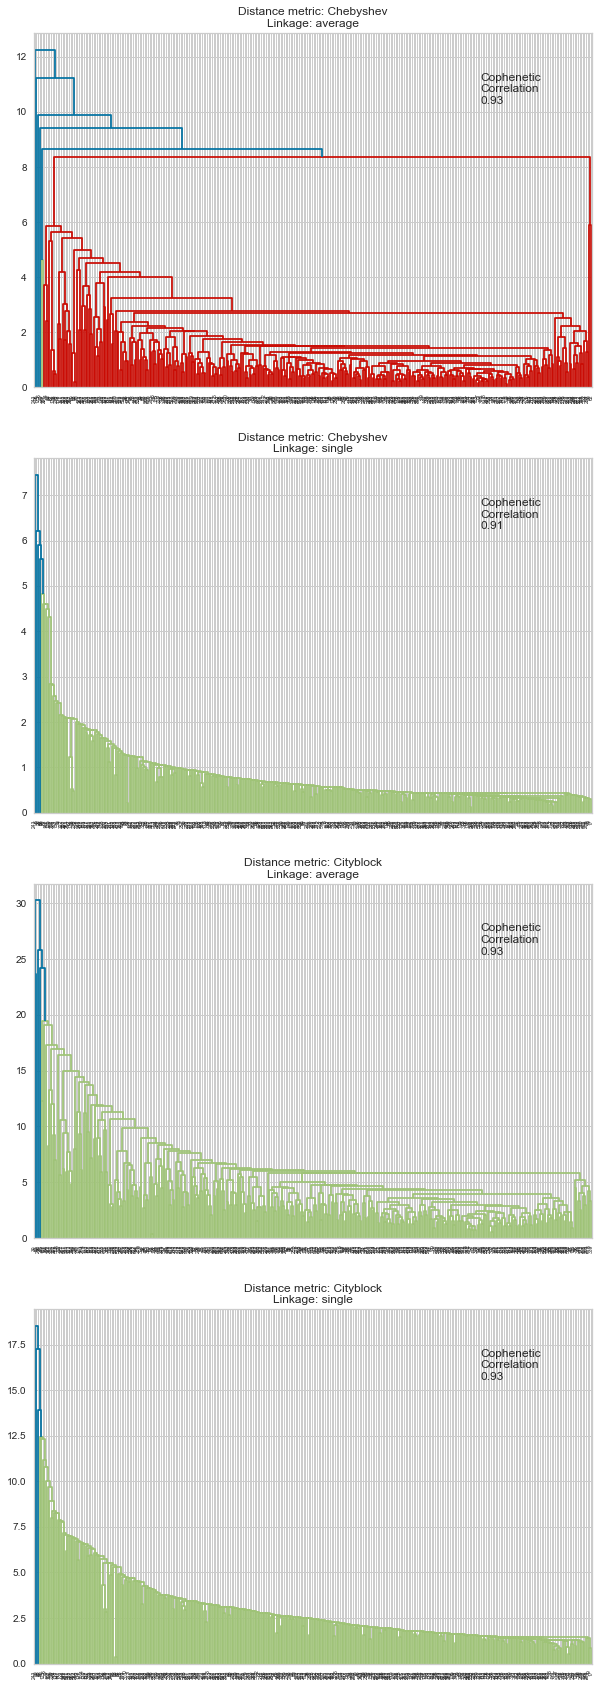

<IPython.core.display.Javascript object>

In [94]:
# list of distance metrics
distance_metrics = ["chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "single"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

Comparing all these dendrograms, Eucledian with Ward Linkage gave better Dendrogram. 

Lets figure out how many clusters to create. We will start verifying for some options and check the Cluster profile and finalize. From the Dendrogram for Ward Linkage with Eucledian distance 4, 5 or 6 looks good.

In [95]:
hc_df1 = hc_df.copy()

<IPython.core.display.Javascript object>

In [96]:
HCmodel1 = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel1.fit(hc_df1)

AgglomerativeClustering(n_clusters=6)

<IPython.core.display.Javascript object>

In [97]:
df11 = df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df1["HC_segments"] = HCmodel1.labels_
df11["HC_segments"] = HCmodel1.labels_

<IPython.core.display.Javascript object>

In [98]:
hc_cluster_profile1 = df11.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [99]:
hc_cluster_profile1["count_in_each_segments"] = (
    df11.groupby("HC_segments")["Ticker_Symbol"].count().values
)

<IPython.core.display.Javascript object>

In [100]:
hc_cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


<IPython.core.display.Javascript object>

Eucledian with Ward linkage with 6 clusters gave these counts in each segment. Lets see for other number of clusters if we can find a better one. 

In [101]:
hc_df2 = hc_df.copy()

<IPython.core.display.Javascript object>

In [102]:
HCmodel2 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel2.fit(hc_df2)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [103]:
df22 = df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df2["HC_segments"] = HCmodel2.labels_
df22["HC_segments"] = HCmodel2.labels_
hc_cluster_profile2 = df22.groupby("HC_segments").mean()
hc_cluster_profile2["count_in_each_segments"] = (
    df22.groupby("HC_segments")["Ticker_Symbol"].count().values
)
hc_cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


<IPython.core.display.Javascript object>

Eucledian with Ward Linkage and 4 clusters looks to be a good Clustering.

In [104]:
hc_df3 = hc_df.copy()

<IPython.core.display.Javascript object>

In [105]:
HCmodel3 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel3.fit(hc_df3)

AgglomerativeClustering(n_clusters=5)

<IPython.core.display.Javascript object>

In [106]:
df33 = df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df3["HC_segments"] = HCmodel3.labels_
df33["HC_segments"] = HCmodel3.labels_
hc_cluster_profile3 = df33.groupby("HC_segments").mean()
hc_cluster_profile3["count_in_each_segments"] = (
    df33.groupby("HC_segments")["Ticker_Symbol"].count().values
)
hc_cluster_profile3.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


<IPython.core.display.Javascript object>

Single, Complete and Average Linkage Methods are not able to do a proper job in forming proper clusters. Majority of the data is going into a single cluster. 
Ward did a better job comparatively and with 4 or 5 clusters and I feel it is good. Even with 6 clusters it is quite good, but the major cluster is not further getting splitted its the same with 285 observations.
So I decided to go with 5 clusters.

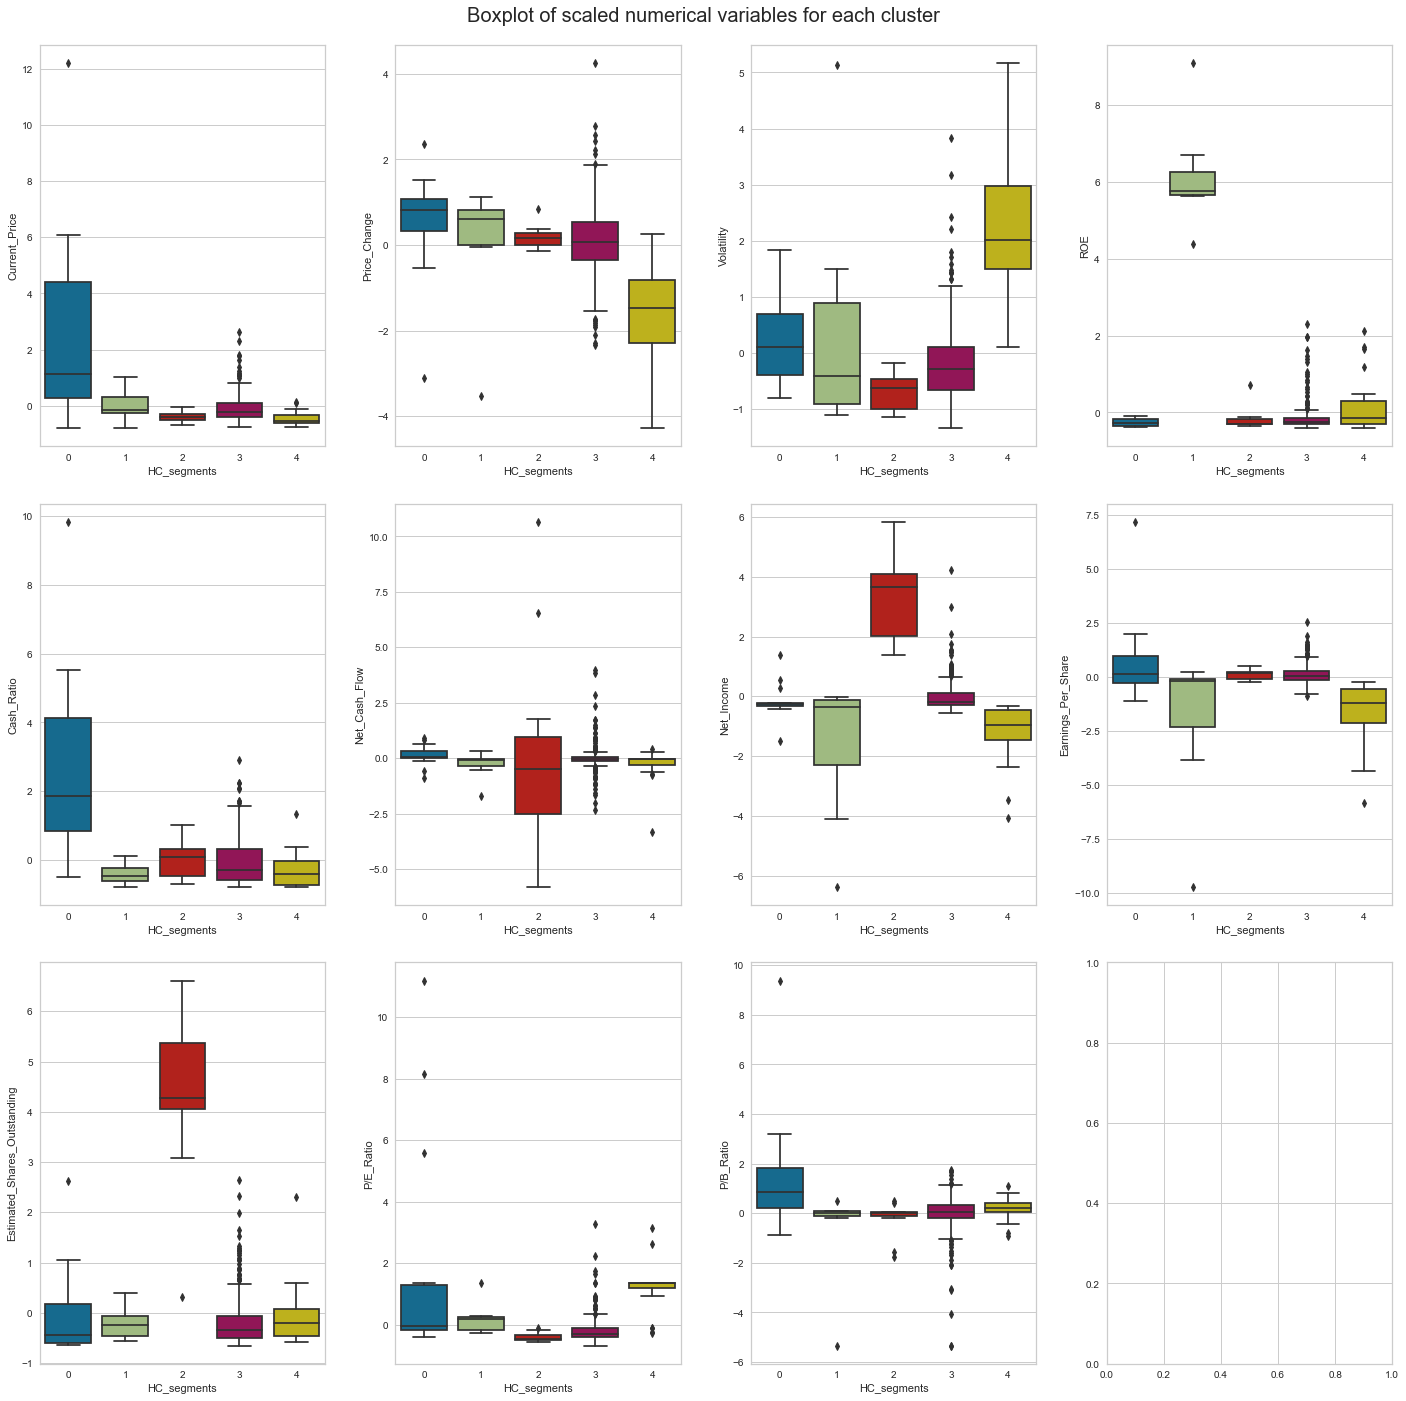

<IPython.core.display.Javascript object>

In [107]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj], y=hc_df3[num_col[counter]], x=hc_df3["HC_segments"],
            )
            counter = counter + 1

fig.tight_layout(pad=2.0)

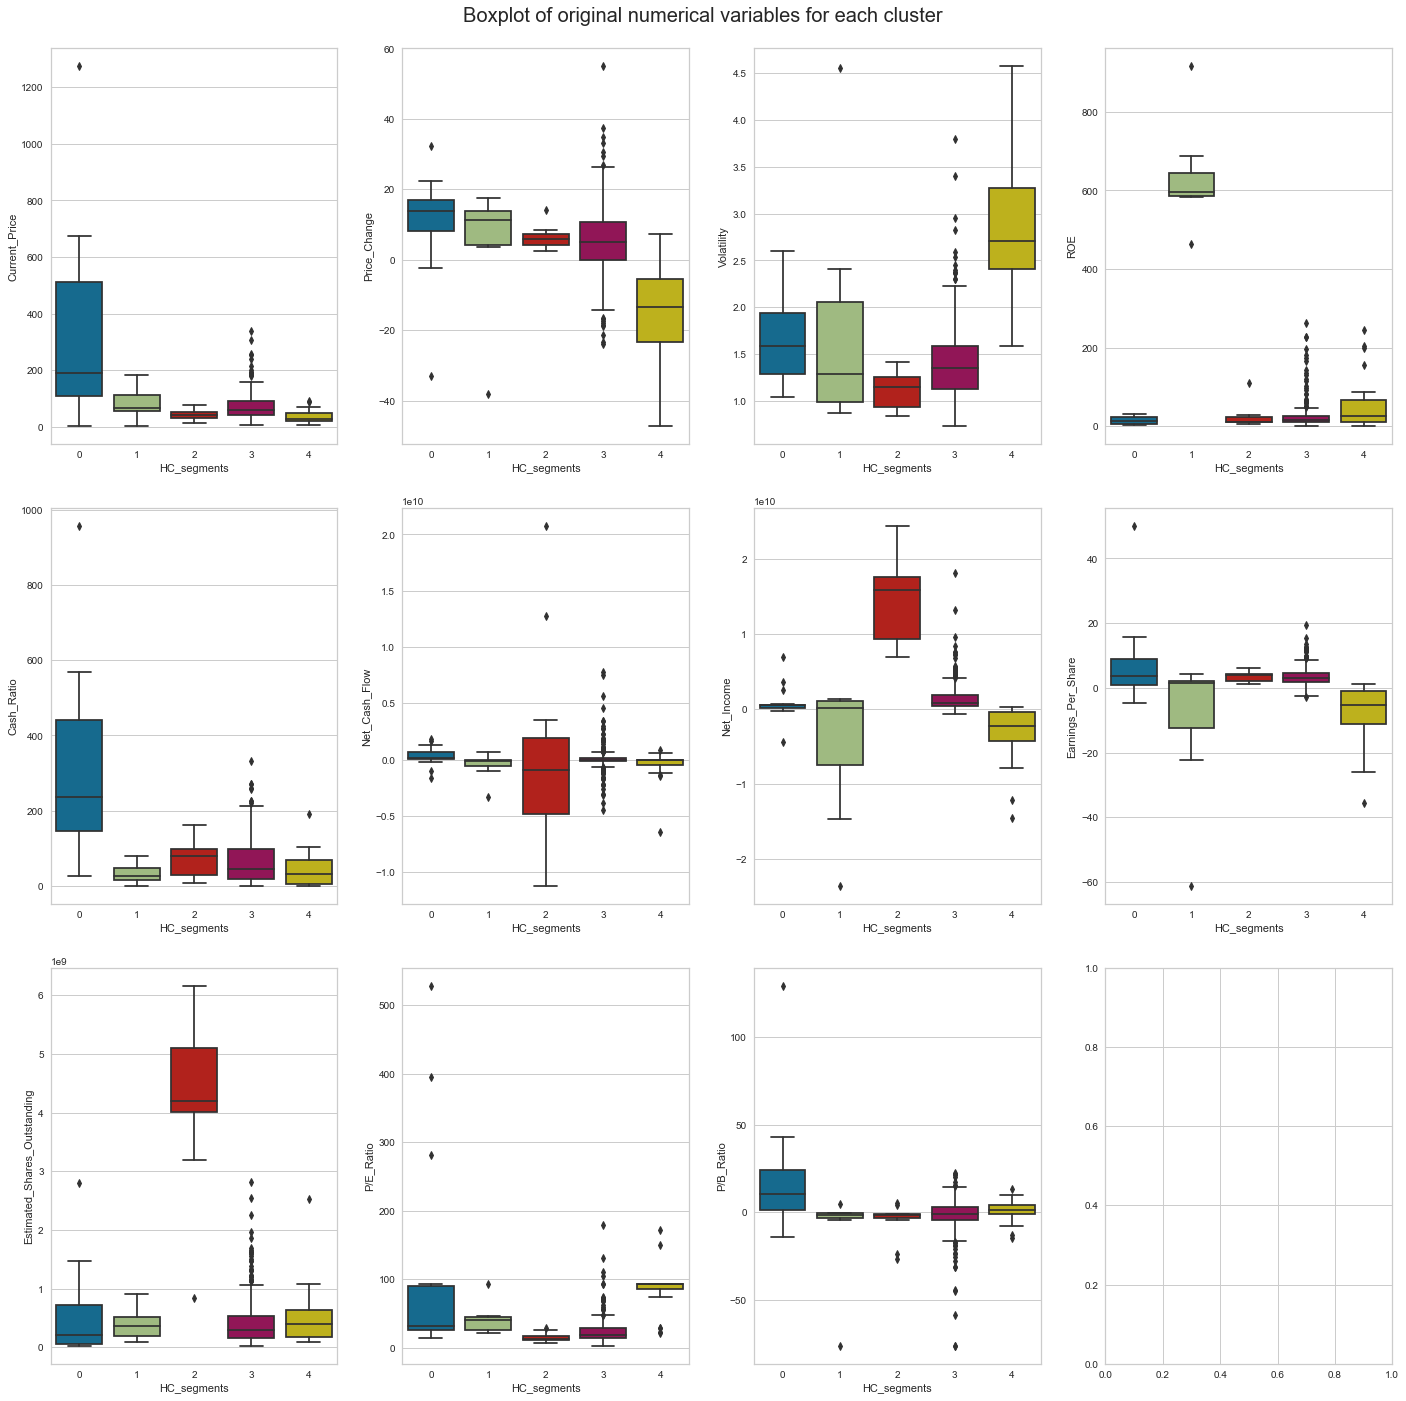

<IPython.core.display.Javascript object>

In [108]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj], y=df33[num_col[counter]], x=df33["HC_segments"],
            )
            counter = counter + 1

fig.tight_layout(pad=2.0)

In [109]:
# Code to find number of companies in each sector, for each of the Clusters
df33.groupby(["HC_segments", "GICS_Sector"])["Security"].count()

HC_segments  GICS_Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

<IPython.core.display.Javascript object>

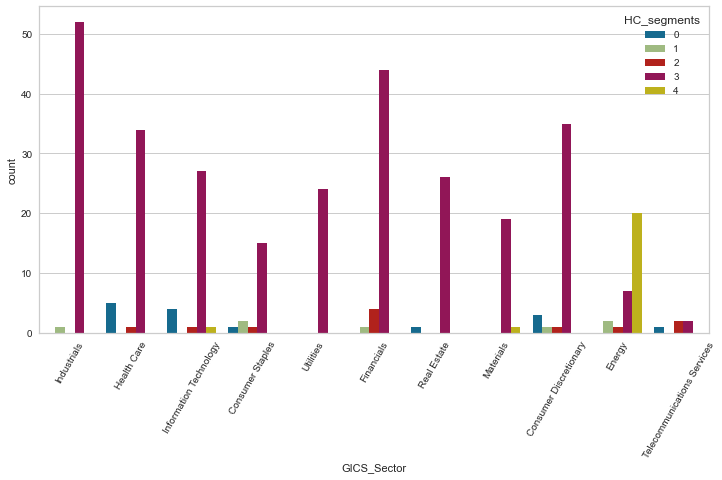

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df33, x="GICS_Sector", hue="HC_segments")
plt.xticks(rotation=60)
plt.show()

## Hierarchical Clustering Insights:
* Cluster 0:
    * This Cluster has 15 companies and it has companies with highest average current price stocks of value 326 dollars and average price change for past 13 weeks is high with 10.56%. 
    * The volatility of the stock prices is not too high too. Average ROE is good at 14.
    * The Cash ratio for the companies in this cluster is too high, so they have surplus cash.
    * The average Net Income of the companies in this cluster is a positive value.
    * The average earnings per share is a good positive value for these companies and highest of all.
    * The companies in this cluster have a high average P/E Ratio; higher P/E Ratio could mean that a stock's price is high relative to earnings and possibly overvalued. These also have a high P/B Ratio which means the stocks are over valued.
    
* Cluster 1:
    * This Cluster has 7 companies and it has companies with average current stock price of 84 dollars. 
    * The average price change for past 13 weeks is at 3.5%. 
    * Average of ROE is too high at 633.
    * The average Net Income of the companies in this cluster is a negative value; so these companies are at loss. The average earnings per share is also negative in this case.
    * The average P/B ratio is too low on negative for the companies in this Cluster.
    
* Cluster 2:
    * This Cluster has 11 companies and it has companies with average current stock price of 42 dollars. 
    * The average price change for past 13 weeks is good at 6.27%. These stock prices are less volatile compared to other clusters. 
    * The volatility is not too high and ROE is also good at average 22.
    * The average Net Income of the companies in this cluster a very good positive value, the highest of all. 
    * The average earnings per share is a good positive value for these companies.
    * For these companies, the average P/B Ratio is on negative side.
    
* Cluster 3:
    * This Cluster has 285 companies, this is the largest cluster and it has companies with average current stock price 72 dollars. 
    * The average price change or past 13 weeks is at 5.2%. 
    * The volatility of the stock prices for this Cluster is medium at 1.4 and ROE is good at 25.
    * The average Net Income of the companies in this cluster is a positive value.
    * The average earnings per share is a good positive value for these companies.
    * These companies also have negative average P/B ratio.
    
* Cluster 4:
    * This Cluster has 22 companies in it and it has companies with lowest average current stock price 36 dollars. 
    * The average price change for past 13 weeks is a negative 16%. So the stock prices have reduced alot. 
    * The stock prices of these companies are highly volatile and ROE is high at 57.
    * The average Net Income of the companies in this cluster is huge negative value, so these are at loss. Relative to Net Income, Earnings per share is also negative for this.
    * The average P/E Ratio for the companies in this cluster is also on a higher end. The average P/B ratio is at 0.8 for the companies.

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [111]:
# setting the number of components to 2
pca = PCA(n_components=2)

pca_df = subset_scaled_df.copy()

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(pca_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

In [112]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.37128995677258525

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

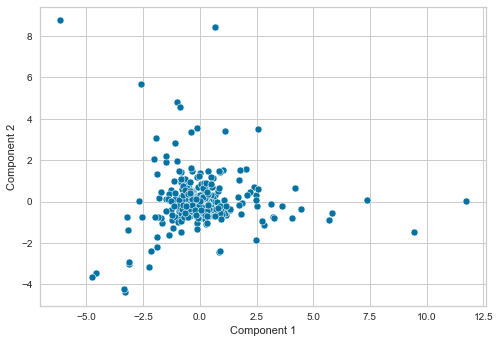

<IPython.core.display.Javascript object>

In [113]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

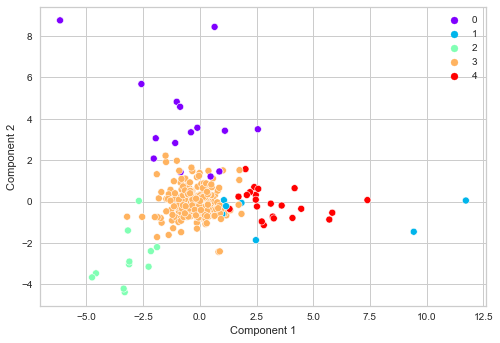

<IPython.core.display.Javascript object>

In [114]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df33["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

Cluster 3 is the majority cluster with majority of observations. The other clusters are comparatively smaller. 

## Add-on: Applying t-distributed Stochastic Neighbor Embedding (t-SNE)

In [115]:
tsne = TSNE(n_components=2, random_state=1)
tsne_df = subset_scaled_df.copy()
tsne_data = tsne.fit_transform(tsne_df)

<IPython.core.display.Javascript object>

In [116]:
tsne_df = pd.DataFrame(data=tsne_data, columns=["Component 1", "Component 2"])
tsne_df.tail()

,Component 1,Component 2
335,10.832,9.560
336,-16.299,3.012
337,-9.178,-9.453
338,1.227,0.856
339,-2.592,-4.179


<IPython.core.display.Javascript object>

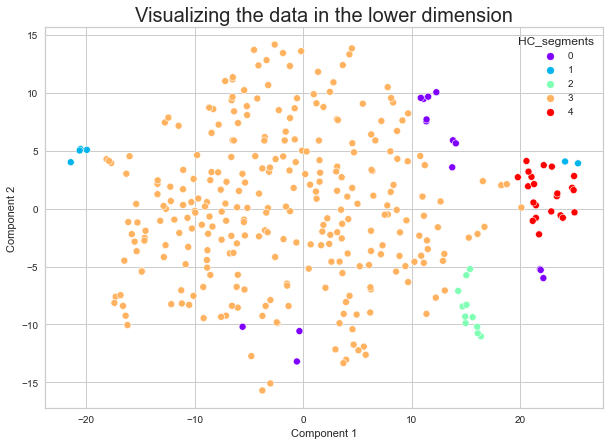

<IPython.core.display.Javascript object>

In [117]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tsne_df,
    x="Component 1",
    y="Component 2",
    hue=df33.HC_segments,
    palette="rainbow",
)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

## K-means vs Hierarchical Clustering

K-Means clustering technique took less time for execution when compared to Hierarchical clustering; since Hierarchical would be doing by distances of all pairs of data points. But finding an optimal K-value in K_means was not straight forward since we have to use multiple techniques like Silhouette scores and Visualizers. Hierarchical on the other hand, it is little easier to determine the number of clusters based on dendrograms. 

I picked number of clusters as 5 in Hierarchical and 4 in k-means. Hierarchical clustering gave more distinct clusters as per my understanding. Both clustering techiniques produced a major cluster with almost 280 observations and other smaller clusters with around 20 observations. And the attributes that differentiated the clusters also looked similar like Net Income, Current Price, EPS and others. 

## Business recommendations:

I believe Hierarchical Clustering technique gave more variable clusters and so considering it as my recommended model. Here the dataset having only 340 observations, the computational time is not too high and thats an advantage I considered along with the clarity in Clusters that made me pick Hierarchical. 

* Companies from Cluster 0 are over valued stocks with higher current price and a good price increase. So investors could consider this cluster if they are ready to start with a higher price per stock investment.

* Companies from Cluster 2 are undervalued stocks; with an average current price of 42 dollars and not too volatile. The P/B ratio shows stock price is trading at a lower price relative to the value of the company's assets. Investors could invest in these with less risk.

* Companies from Cluster 3 have average current price of 72 dollars and other factors matches mostly with Cluster 2.

Companies in Cluster 2 are best to invest. The companies from Cluster 2 are :

Bank of America, Wells Fargo, JPMorgan Chase & Co., Citigroup Inc.
Ford Motor, Intel Corp, Coca Cola Company, Pfizer Inc, AT&T Inc, Verizon Communications and Exxon Mobil Corp.